In [ ]:
#references:
#https://www.kaggle.com/code/alizahidraja/covid-19-find-the-right-research-paper-with-tags/data
#https://www.kaggle.com/datasets/pariza/bbc-news-summary/code
#https://iq.opengenus.org/latent-semantic-analysis-for-text-summarization/
#https://www.datacamp.com/tutorial/discovering-hidden-topics-python
#https://www.kaggle.com/code/swetarajsinha/bbc-news-naive-bayes-decision-trees-random-forest

# installing and importing needed libraries

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import os
import json
from pprint import pprint
from copy import deepcopy

import numpy as np
from tqdm.notebook import tqdm
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 nltk.download('omw-1.4')
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nourh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sumy.summarizers.lsa import LsaSummarizer
# Parsing the text string using PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
import nltk
nltk.download('punkt')

# integrating datasets

In [ ]:
file_names = os.listdir('business/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('business/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
business = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
business["lable"]="business"
business.drop("file_name",axis=1,inplace=True)

business

,text,lable
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
505,Trial begins of Spain's top banker\n\nThe tria...,business
506,UK economy ends year with spurt\n\nThe UK econ...,business
507,HealthSouth ex-boss goes on trial\n\nThe forme...,business
508,Euro firms miss out on optimism\n\nMore than 9...,business


In [ ]:
file_names = os.listdir('entertainment/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('entertainment/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
entertainment = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
entertainment["lable"]="entertainment"
entertainment.drop("file_name",axis=1,inplace=True)

entertainment

,text,lable
0,Gallery unveils interactive tree\n\nA Christma...,entertainment
1,Jarre joins fairytale celebration\n\nFrench mu...,entertainment
2,Musical treatment for Capra film\n\nThe classi...,entertainment
3,Richard and Judy choose top books\n\nThe 10 au...,entertainment
4,Poppins musical gets flying start\n\nThe stage...,entertainment
...,...,...
381,Last Star Wars 'not for children'\n\nThe sixth...,entertainment
382,French honour for director Parker\n\nBritish f...,entertainment
383,Robots march to US cinema summit\n\nAnimated m...,entertainment
384,Hobbit picture 'four years away'\n\nLord of th...,entertainment


In [ ]:
file_names = os.listdir('politics/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('politics/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
politics = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
politics["lable"]="politics"
politics.drop("file_name",axis=1,inplace=True)
politics


,text,lable
0,Labour plans maternity pay rise\n\nMaternity p...,politics
1,Watchdog probes e-mail deletions\n\nThe inform...,politics
2,Hewitt decries 'career sexism'\n\nPlans to ext...,politics
3,Labour chooses Manchester\n\nThe Labour Party ...,politics
4,Brown ally rejects Budget spree\n\nChancellor ...,politics
...,...,...
412,Sainsbury's Labour election gift\n\nScience Mi...,politics
413,Blair 'up for it' ahead of poll\n\nTony Blair ...,politics
414,Labour MP praises Tory campaign\n\nThe Conserv...,politics
415,Top Tories on Lib Dem 'hit list'\n\nThe Libera...,politics


In [ ]:
file_names = os.listdir('sport/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('sport/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
sport = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
sport["lable"]="sport"
sport.drop("file_name",axis=1,inplace=True)

sport


,text,lable
0,Claxton hunting first major medal\n\nBritish h...,sport
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,sport
2,Greene sets sights on world title\n\nMaurice G...,sport
3,IAAF launches fight against drugs\n\nThe IAAF ...,sport
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",sport
...,...,...
506,Big guns ease through in San Jose\n\nTop-seede...,sport
507,Almagro continues Spanish surge\n\nUnseeded Ni...,sport
508,Melzer shocks Agassi in San Jose\n\nSecond see...,sport
509,Mirza makes Indian tennis history\n\nTeenager ...,sport


In [ ]:
file_names = os.listdir('tech/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('tech/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
tech = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
tech["lable"]="tech"
tech.drop("file_name",axis=1,inplace=True)

tech


,text,lable
0,Ink helps drive democracy in Asia\n\nThe Kyrgy...,tech
1,China net cafe culture crackdown\n\nChinese au...,tech
2,Microsoft seeking spyware trojan\n\nMicrosoft ...,tech
3,Digital guru floats sub-$100 PC\n\nNicholas Ne...,tech
4,Technology gets the creative bug\n\nThe hi-tec...,tech
...,...,...
396,BT program to beat dialler scams\n\nBT is intr...,tech
397,Spam e-mails tempt net shoppers\n\nComputer us...,tech
398,Be careful how you code\n\nA new European dire...,tech
399,US cyber security chief resigns\n\nThe man mak...,tech


In [ ]:
# reference: https://www.kaggle.com/code/alizahidraja/covid-19-find-the-right-research-paper-with-tags/notebook
def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

        
    return "; ".join(formatted)


def load_files(dirname):
    filenames = os.listdir(dirname)
    raw_files = []

    for filename in tqdm(filenames):
        filename = dirname + filename
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    
    return raw_files

def generate_clean_df(all_files):
    cleaned_files = []
    
    for file in tqdm(all_files):
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]

        cleaned_files.append(features)

    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']

    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df = clean_df.drop(['raw_authors', 'raw_bibliography'], axis=1)
    clean_df.head()
    
    return clean_df

In [ ]:
pmc_dir = '2020-03-13/pmc_custom_license/pmc_custom_license/'
pmc_files = load_files(pmc_dir)
pmc_df = generate_clean_df(pmc_files)
print(pmc_df.shape)
pmc_df.head()

  0%|          | 0/1426 [00:00<?, ?it/s]

  0%|          | 0/1426 [00:00<?, ?it/s]

(1426, 7)


,paper_id,title,authors,affiliations,abstract,text,bibliography
0,002f09dfc9a1323a15bf72e349d8b733ac97a2aa,,,,,\n\nT he modern word camel is derived from the...,Ancient and modern DNA reveal dynamics of dome...
1,0036e8891c93ae63611bde179ada1e03e8577dea,Stable Occupancy of the Crimean-Congo Hemorrha...,"Florine E M Scholte, Brian L Hua, Jessica R Sp...",Florine E M Scholte (National Center for Emerg...,Abstract\n\nCrimean-Congo hemorrhagic fever vi...,\n\nto Western Europe with the assistance of m...,Seroepidemiological studies of Crimean-Congo h...
2,00573277e6be50669016f770bc28ec2da0639a8f,Asymptomatic Severe Acute Respiratory Syndrome...,,,,\n\nWe identified a nurse who was asymptomatic...,Coronavirus as a possible cause of severe acut...
3,00683d59d56123ae85e080d00ef1b3edd3f7405d,A Rift Valley fever (RVF) epidemic affecting a...,"Raphaëlle Métras, Marc Baguelin, W John Edmund...","Raphaëlle Métras, Marc Baguelin, W John Edmund...",Abstract\n\nThe first cases occurred after hea...,R ift Valley fever (RVF) is a zoonotic arbovir...,Rift Valley fever virus (Bunyaviridae: Phlebov...
4,0104f6ceccf92ae8567a0102f89cbb976969a774,BMC Medical Genetics Association of HLA class ...,"Marie Lin, Hsiang-Kuang Tseng, Jean A Trejaut,...","Marie Lin (Mackay Memorial Hospital, Taipei, T...",Abstract\n\nThe human leukocyte antigen (HLA) ...,"\n\npatient group, a further significant incre...",for surveillance of severe acute respiratory s...


In [ ]:
med_df = pmc_df[["text"]]
med_df["lable"]="Medical"
med_df

C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\2850722915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_df["lable"]="Medical"


,text,lable
0,\n\nT he modern word camel is derived from the...,Medical
1,\n\nto Western Europe with the assistance of m...,Medical
2,\n\nWe identified a nurse who was asymptomatic...,Medical
3,R ift Valley fever (RVF) is a zoonotic arbovir...,Medical
4,"\n\npatient group, a further significant incre...",Medical
...,...,...
1421,introduction\n\nDespite the fact that total hi...,Medical
1422,\n\nresults of studies conducted in other coun...,Medical
1423,\n\nH uman coronaviruses (HCoVs) were first re...,Medical
1424,\n\nDuring an outbreak of severe acute respira...,Medical


In [ ]:
med_df2=med_df.iloc[:500,:]
med_df2


,text,lable
0,\n\nT he modern word camel is derived from the...,Medical
1,\n\nto Western Europe with the assistance of m...,Medical
2,\n\nWe identified a nurse who was asymptomatic...,Medical
3,R ift Valley fever (RVF) is a zoonotic arbovir...,Medical
4,"\n\npatient group, a further significant incre...",Medical
...,...,...
495,M iddle East respiratory syndrome coronavirus ...,Medical
496,Background\n\nSince November 2002 (and perhaps...,Medical
497,INTRODUCTION\n\nAround 350 million people worl...,Medical
498,The Study\n\nBat serum specimens (n = 705) col...,Medical


In [ ]:
final_df = pd.concat([business,entertainment,politics,sport,tech, med_df2])
final_df

,text,lable
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
495,M iddle East respiratory syndrome coronavirus ...,Medical
496,Background\n\nSince November 2002 (and perhaps...,Medical
497,INTRODUCTION\n\nAround 350 million people worl...,Medical
498,The Study\n\nBat serum specimens (n = 705) col...,Medical


In [ ]:
final_df.to_csv("final_dataset_min.csv")

# preprocessing

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

final_df['lem_sentences'] = final_df.text.apply(lemmatize_text)

In [ ]:
final_df

,text,lable,lem_sentences
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte..."
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o..."
3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,..."
...,...,...,...
495,M iddle East respiratory syndrome coronavirus ...,Medical,"[M, iddle, East, respiratory, syndrome, corona..."
496,Background\n\nSince November 2002 (and perhaps...,Medical,"[Background, Since, November, 2002, (and, perh..."
497,INTRODUCTION\n\nAround 350 million people worl...,Medical,"[INTRODUCTION, Around, 350, million, people, w..."
498,The Study\n\nBat serum specimens (n = 705) col...,Medical,"[The, Study, Bat, serum, specimen, (n, =, 705)..."


In [ ]:
import string
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

# def remove_extra_whitespaces_func(text):
#     return re.sub(r'^\s*|\s\s*', ' ', text).strip()

def remove_stopwords(word_list):
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    return filtered_words




In [ ]:

final_df['clean_text']=final_df['lem_sentences'].apply(lambda x : remove_stopwords(x))  


In [ ]:

final_df['textt_to_be_clean'] = final_df['clean_text'].apply(lambda x: ' '.join([i for i in x]))
final_df

,text,lable,lem_sentences,clean_text,textt_to_be_clean
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte...","[Ad, sale, boost, Time, Warner, profit, Quarte...",Ad sale boost Time Warner profit Quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol...","[Dollar, gain, Greenspan, speech, The, dollar,...",Dollar gain Greenspan speech The dollar ha hit...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o...","[Yukos, unit, buyer, face, loan, claim, The, o...",Yukos unit buyer face loan claim The owner emb...
3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British...","[High, fuel, price, hit, BA's, profit, British...",High fuel price hit BA's profit British Airway...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,...","[Pernod, takeover, talk, lift, Domecq, Shares,...",Pernod takeover talk lift Domecq Shares UK dri...
...,...,...,...,...,...
495,M iddle East respiratory syndrome coronavirus ...,Medical,"[M, iddle, East, respiratory, syndrome, corona...","[M, iddle, East, respiratory, syndrome, corona...",M iddle East respiratory syndrome coronavirus ...
496,Background\n\nSince November 2002 (and perhaps...,Medical,"[Background, Since, November, 2002, (and, perh...","[Background, Since, November, 2002, (and, perh...",Background Since November 2002 (and perhaps ea...
497,INTRODUCTION\n\nAround 350 million people worl...,Medical,"[INTRODUCTION, Around, 350, million, people, w...","[INTRODUCTION, Around, 350, million, people, w...",INTRODUCTION Around 350 million people worldwi...
498,The Study\n\nBat serum specimens (n = 705) col...,Medical,"[The, Study, Bat, serum, specimen, (n, =, 705)...","[The, Study, Bat, serum, specimen, (n, =, 705)...",The Study Bat serum specimen (n = 705) collect...


In [ ]:
def preprocess(ReviewTxt):
    ReviewTxt = ReviewTxt.str.replace("(<br/>)", "")
    ReviewTxt = ReviewTxt.str.replace('(<a).*(>).*(</a>)', '')
    ReviewTxt = ReviewTxt.str.replace('(&amp)', '')
    ReviewTxt = ReviewTxt.str.replace('(&gt)', '')
    ReviewTxt = ReviewTxt.str.replace('(&lt)', '')
    ReviewTxt = ReviewTxt.str.replace('(\xa0)', ' ')  
    return ReviewTxt

def clean_sentences(sentences):
    global new_text
    new_text=[]
    tokens=[]

    up_filtered_text=[]
    for i in sentences:
        txt=i.replace('\n\n', ' ')
        txt2=txt.replace('\n', ' ')
        txt3=txt2.replace("\'s", "'s")
        txt4=re.sub('[^A-Za-z]+', ' ',txt3)
        txt5=txt4.replace('{html}',"") 
        cleanr = re.compile('<.,*?>')
        cleantext = re.sub(cleanr, '', txt5)
        rem_url=re.sub(r'http\S+', '',cleantext)  

        up_filtered_text.append(rem_url.lower())

    up_filtered_text = [x.strip('  ') for x in up_filtered_text]
    return (up_filtered_text)

In [ ]:

final_df['clean_text2']=preprocess(final_df['textt_to_be_clean'])


C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\179932415.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace("(<br/>)", "")
C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\179932415.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(<a).*(>).*(</a>)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\179932415.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&amp)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\179932415.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&gt)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\179932415.py:6: FutureWarning: The default value of regex will change from True to False in a futur

In [ ]:
final_df

,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte...","[Ad, sale, boost, Time, Warner, profit, Quarte...",Ad sale boost Time Warner profit Quarterly pro...,Ad sale boost Time Warner profit Quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol...","[Dollar, gain, Greenspan, speech, The, dollar,...",Dollar gain Greenspan speech The dollar ha hit...,Dollar gain Greenspan speech The dollar ha hit...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o...","[Yukos, unit, buyer, face, loan, claim, The, o...",Yukos unit buyer face loan claim The owner emb...,Yukos unit buyer face loan claim The owner emb...
3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British...","[High, fuel, price, hit, BA's, profit, British...",High fuel price hit BA's profit British Airway...,High fuel price hit BA's profit British Airway...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,...","[Pernod, takeover, talk, lift, Domecq, Shares,...",Pernod takeover talk lift Domecq Shares UK dri...,Pernod takeover talk lift Domecq Shares UK dri...
...,...,...,...,...,...,...
495,M iddle East respiratory syndrome coronavirus ...,Medical,"[M, iddle, East, respiratory, syndrome, corona...","[M, iddle, East, respiratory, syndrome, corona...",M iddle East respiratory syndrome coronavirus ...,M iddle East respiratory syndrome coronavirus ...
496,Background\n\nSince November 2002 (and perhaps...,Medical,"[Background, Since, November, 2002, (and, perh...","[Background, Since, November, 2002, (and, perh...",Background Since November 2002 (and perhaps ea...,Background Since November 2002 (and perhaps ea...
497,INTRODUCTION\n\nAround 350 million people worl...,Medical,"[INTRODUCTION, Around, 350, million, people, w...","[INTRODUCTION, Around, 350, million, people, w...",INTRODUCTION Around 350 million people worldwi...,INTRODUCTION Around 350 million people worldwi...
498,The Study\n\nBat serum specimens (n = 705) col...,Medical,"[The, Study, Bat, serum, specimen, (n, =, 705)...","[The, Study, Bat, serum, specimen, (n, =, 705)...",The Study Bat serum specimen (n = 705) collect...,The Study Bat serum specimen (n = 705) collect...


In [ ]:

final_df['clean_text2']=clean_sentences(final_df['clean_text2'])
final_df

,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte...","[Ad, sale, boost, Time, Warner, profit, Quarte...",Ad sale boost Time Warner profit Quarterly pro...,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol...","[Dollar, gain, Greenspan, speech, The, dollar,...",Dollar gain Greenspan speech The dollar ha hit...,dollar gain greenspan speech the dollar ha hit...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o...","[Yukos, unit, buyer, face, loan, claim, The, o...",Yukos unit buyer face loan claim The owner emb...,yukos unit buyer face loan claim the owner emb...
3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British...","[High, fuel, price, hit, BA's, profit, British...",High fuel price hit BA's profit British Airway...,high fuel price hit ba s profit british airway...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,...","[Pernod, takeover, talk, lift, Domecq, Shares,...",Pernod takeover talk lift Domecq Shares UK dri...,pernod takeover talk lift domecq shares uk dri...
...,...,...,...,...,...,...
495,M iddle East respiratory syndrome coronavirus ...,Medical,"[M, iddle, East, respiratory, syndrome, corona...","[M, iddle, East, respiratory, syndrome, corona...",M iddle East respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...
496,Background\n\nSince November 2002 (and perhaps...,Medical,"[Background, Since, November, 2002, (and, perh...","[Background, Since, November, 2002, (and, perh...",Background Since November 2002 (and perhaps ea...,background since november and perhaps earlier ...
497,INTRODUCTION\n\nAround 350 million people worl...,Medical,"[INTRODUCTION, Around, 350, million, people, w...","[INTRODUCTION, Around, 350, million, people, w...",INTRODUCTION Around 350 million people worldwi...,introduction around million people worldwide c...
498,The Study\n\nBat serum specimens (n = 705) col...,Medical,"[The, Study, Bat, serum, specimen, (n, =, 705)...","[The, Study, Bat, serum, specimen, (n, =, 705)...",The Study Bat serum specimen (n = 705) collect...,the study bat serum specimen n collected south...


In [ ]:
final_df['clean_text2'][100]

'introduction dr carlo urbani wa first person recognize severe acute respiratory syndrome sars hanoi vietnam hospital on march one month discovery dr urbani died disease largely belief doctor s duty stay close victims his wife giuliani mother three challenged husband point dr urbani replied if i can t work situations i for with question avian epidemic indeed pandemics looming ahead might well consider extent risk incumbent physician s role facing contagious populations while level risk embraced dr urbani far exceeds i believe expected i show nonetheless general duty treat professionally appropriate level risk grounded natural moral obligation medical profession s reciprocal standing public trust sketching the argument in essay titled in harm s way ama physicians duty treat i argued physician s duty treat personal risk followed language history precedent american medical association s code ethics argument wa sound morally relevant ways the present essay borrows substantially argument ar

In [ ]:

final_df['clean_text2']=final_df['clean_text2'].apply(lambda x : remove_URL(x))  
final_df['clean_text2']=final_df['clean_text2'].apply(lambda x : remove_html(x))
# final_df['clean_text3']=final_df['clean_text2'].apply(lambda x : remove_punct(x))  

In [ ]:
final_df

,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte...","[Ad, sale, boost, Time, Warner, profit, Quarte...",Ad sale boost Time Warner profit Quarterly pro...,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol...","[Dollar, gain, Greenspan, speech, The, dollar,...",Dollar gain Greenspan speech The dollar ha hit...,dollar gain greenspan speech the dollar ha hit...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o...","[Yukos, unit, buyer, face, loan, claim, The, o...",Yukos unit buyer face loan claim The owner emb...,yukos unit buyer face loan claim the owner emb...
3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British...","[High, fuel, price, hit, BA's, profit, British...",High fuel price hit BA's profit British Airway...,high fuel price hit ba s profit british airway...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,...","[Pernod, takeover, talk, lift, Domecq, Shares,...",Pernod takeover talk lift Domecq Shares UK dri...,pernod takeover talk lift domecq shares uk dri...
...,...,...,...,...,...,...
495,M iddle East respiratory syndrome coronavirus ...,Medical,"[M, iddle, East, respiratory, syndrome, corona...","[M, iddle, East, respiratory, syndrome, corona...",M iddle East respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...
496,Background\n\nSince November 2002 (and perhaps...,Medical,"[Background, Since, November, 2002, (and, perh...","[Background, Since, November, 2002, (and, perh...",Background Since November 2002 (and perhaps ea...,background since november and perhaps earlier ...
497,INTRODUCTION\n\nAround 350 million people worl...,Medical,"[INTRODUCTION, Around, 350, million, people, w...","[INTRODUCTION, Around, 350, million, people, w...",INTRODUCTION Around 350 million people worldwi...,introduction around million people worldwide c...
498,The Study\n\nBat serum specimens (n = 705) col...,Medical,"[The, Study, Bat, serum, specimen, (n, =, 705)...","[The, Study, Bat, serum, specimen, (n, =, 705)...",The Study Bat serum specimen (n = 705) collect...,the study bat serum specimen n collected south...


In [ ]:
def preprocess(ReviewTxt):
    ReviewTxt = ReviewTxt.str.replace("(<br/>)", "")
    ReviewTxt = ReviewTxt.str.replace('(<a).*(>).*(</a>)', '')
    ReviewTxt = ReviewTxt.str.replace('(&amp)', '')
    ReviewTxt = ReviewTxt.str.replace('(&gt)', '')
    ReviewTxt = ReviewTxt.str.replace('(&lt)', '')
    ReviewTxt = ReviewTxt.str.replace('(\xa0)', ' ')  
    return ReviewTxt

def clean_sentences(sentences):
    global new_text
    new_text=[]
    tokens=[]

    up_filtered_text=[]
    for i in sentences:
        txt=i.replace('.', '')
        txt2=txt.replace('-', ' ')
        txt3=txt2.replace("(", "")
        txt4=re.sub('[^A-Za-z]+', ' ',txt3)
        txt5=txt4.replace(')',"") 
        cleanr = re.compile('<.,*?>')
        cleantext = re.sub(cleanr, '', txt5)
        rem_url=re.sub(r'http\S+', '',cleantext)  

        up_filtered_text.append(rem_url.lower())

    up_filtered_text = [x.strip('  ') for x in up_filtered_text]
    return (up_filtered_text)

In [ ]:

final_df['clean_text3']=preprocess(final_df['clean_text2'])
# stem_words=remove_extra_whitespaces_func(df['text'])


C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\4100068396.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace("(<br/>)", "")
C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\4100068396.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(<a).*(>).*(</a>)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\4100068396.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&amp)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\4100068396.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&gt)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\4100068396.py:6: FutureWarning: The default value of regex will change from True to False in a 

In [ ]:
final_df['clean_text3']=clean_sentences(final_df['clean_text3'])

In [ ]:
final_df['clean_text3'][100]

'introduction dr carlo urbani wa first person recognize severe acute respiratory syndrome sars hanoi vietnam hospital on march one month discovery dr urbani died disease largely belief doctor s duty stay close victims his wife giuliani mother three challenged husband point dr urbani replied if i can t work situations i for with question avian epidemic indeed pandemics looming ahead might well consider extent risk incumbent physician s role facing contagious populations while level risk embraced dr urbani far exceeds i believe expected i show nonetheless general duty treat professionally appropriate level risk grounded natural moral obligation medical profession s reciprocal standing public trust sketching the argument in essay titled in harm s way ama physicians duty treat i argued physician s duty treat personal risk followed language history precedent american medical association s code ethics argument wa sound morally relevant ways the present essay borrows substantially argument ar

In [ ]:
stop = stopwords.words('english')
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
final_df['clean_text4'] = final_df['clean_text3'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
final_df

,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2,clean_text3,clean_text4
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte...","[Ad, sale, boost, Time, Warner, profit, Quarte...",Ad sale boost Time Warner profit Quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol...","[Dollar, gain, Greenspan, speech, The, dollar,...",Dollar gain Greenspan speech The dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech dollar ha hit hig...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o...","[Yukos, unit, buyer, face, loan, claim, The, o...",Yukos unit buyer face loan claim The owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim owner embattl...
3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British...","[High, fuel, price, hit, BA's, profit, British...",High fuel price hit BA's profit British Airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba profit british airways ...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,...","[Pernod, takeover, talk, lift, Domecq, Shares,...",Pernod takeover talk lift Domecq Shares UK dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...
...,...,...,...,...,...,...,...,...
495,M iddle East respiratory syndrome coronavirus ...,Medical,"[M, iddle, East, respiratory, syndrome, corona...","[M, iddle, East, respiratory, syndrome, corona...",M iddle East respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...,iddle east respiratory syndrome coronavirus me...
496,Background\n\nSince November 2002 (and perhaps...,Medical,"[Background, Since, November, 2002, (and, perh...","[Background, Since, November, 2002, (and, perh...",Background Since November 2002 (and perhaps ea...,background since november and perhaps earlier ...,background since november and perhaps earlier ...,background since november perhaps earlier outb...
497,INTRODUCTION\n\nAround 350 million people worl...,Medical,"[INTRODUCTION, Around, 350, million, people, w...","[INTRODUCTION, Around, 350, million, people, w...",INTRODUCTION Around 350 million people worldwi...,introduction around million people worldwide c...,introduction around million people worldwide c...,introduction around million people worldwide c...
498,The Study\n\nBat serum specimens (n = 705) col...,Medical,"[The, Study, Bat, serum, specimen, (n, =, 705)...","[The, Study, Bat, serum, specimen, (n, =, 705)...",The Study Bat serum specimen (n = 705) collect...,the study bat serum specimen n collected south...,the study bat serum specimen n collected south...,study bat serum specimen n collected south afr...


In [ ]:
final_df.reset_index(inplace=True)
final_df.drop("index",axis=1,inplace=True)
final_df

,level_0,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2,clean_text3,clean_text4
0,0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte...","[Ad, sale, boost, Time, Warner, profit, Quarte...",Ad sale boost Time Warner profit Quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...
1,1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol...","[Dollar, gain, Greenspan, speech, The, dollar,...",Dollar gain Greenspan speech The dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech dollar ha hit hig...
2,2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o...","[Yukos, unit, buyer, face, loan, claim, The, o...",Yukos unit buyer face loan claim The owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim owner embattl...
3,3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British...","[High, fuel, price, hit, BA's, profit, British...",High fuel price hit BA's profit British Airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba profit british airways ...
4,4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,...","[Pernod, takeover, talk, lift, Domecq, Shares,...",Pernod takeover talk lift Domecq Shares UK dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...
...,...,...,...,...,...,...,...,...,...
2720,2720,M iddle East respiratory syndrome coronavirus ...,Medical,"[M, iddle, East, respiratory, syndrome, corona...","[M, iddle, East, respiratory, syndrome, corona...",M iddle East respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...,iddle east respiratory syndrome coronavirus me...
2721,2721,Background\n\nSince November 2002 (and perhaps...,Medical,"[Background, Since, November, 2002, (and, perh...","[Background, Since, November, 2002, (and, perh...",Background Since November 2002 (and perhaps ea...,background since november and perhaps earlier ...,background since november and perhaps earlier ...,background since november perhaps earlier outb...
2722,2722,INTRODUCTION\n\nAround 350 million people worl...,Medical,"[INTRODUCTION, Around, 350, million, people, w...","[INTRODUCTION, Around, 350, million, people, w...",INTRODUCTION Around 350 million people worldwi...,introduction around million people worldwide c...,introduction around million people worldwide c...,introduction around million people worldwide c...
2723,2723,The Study\n\nBat serum specimens (n = 705) col...,Medical,"[The, Study, Bat, serum, specimen, (n, =, 705)...","[The, Study, Bat, serum, specimen, (n, =, 705)...",The Study Bat serum specimen (n = 705) collect...,the study bat serum specimen n collected south...,the study bat serum specimen n collected south...,study bat serum specimen n collected south afr...


In [ ]:
final_df.drop("level_0",axis=1,inplace=True)
final_df

,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2,clean_text3,clean_text4
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte...","[Ad, sale, boost, Time, Warner, profit, Quarte...",Ad sale boost Time Warner profit Quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol...","[Dollar, gain, Greenspan, speech, The, dollar,...",Dollar gain Greenspan speech The dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech dollar ha hit hig...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o...","[Yukos, unit, buyer, face, loan, claim, The, o...",Yukos unit buyer face loan claim The owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim owner embattl...
3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British...","[High, fuel, price, hit, BA's, profit, British...",High fuel price hit BA's profit British Airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba profit british airways ...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,...","[Pernod, takeover, talk, lift, Domecq, Shares,...",Pernod takeover talk lift Domecq Shares UK dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...
...,...,...,...,...,...,...,...,...
2720,M iddle East respiratory syndrome coronavirus ...,Medical,"[M, iddle, East, respiratory, syndrome, corona...","[M, iddle, East, respiratory, syndrome, corona...",M iddle East respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...,iddle east respiratory syndrome coronavirus me...
2721,Background\n\nSince November 2002 (and perhaps...,Medical,"[Background, Since, November, 2002, (and, perh...","[Background, Since, November, 2002, (and, perh...",Background Since November 2002 (and perhaps ea...,background since november and perhaps earlier ...,background since november and perhaps earlier ...,background since november perhaps earlier outb...
2722,INTRODUCTION\n\nAround 350 million people worl...,Medical,"[INTRODUCTION, Around, 350, million, people, w...","[INTRODUCTION, Around, 350, million, people, w...",INTRODUCTION Around 350 million people worldwi...,introduction around million people worldwide c...,introduction around million people worldwide c...,introduction around million people worldwide c...
2723,The Study\n\nBat serum specimens (n = 705) col...,Medical,"[The, Study, Bat, serum, specimen, (n, =, 705)...","[The, Study, Bat, serum, specimen, (n, =, 705)...",The Study Bat serum specimen (n = 705) collect...,the study bat serum specimen n collected south...,the study bat serum specimen n collected south...,study bat serum specimen n collected south afr...


In [ ]:

final_df['tokenized_sents'] = final_df.apply(lambda row: nltk.word_tokenize(row['clean_text4']), axis=1)
final_df

,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2,clean_text3,clean_text4,tokenized_sents
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte...","[Ad, sale, boost, Time, Warner, profit, Quarte...",Ad sale boost Time Warner profit Quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...,"[ad, sale, boost, time, warner, profit, quarte..."
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol...","[Dollar, gain, Greenspan, speech, The, dollar,...",Dollar gain Greenspan speech The dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech dollar ha hit hig...,"[dollar, gain, greenspan, speech, dollar, ha, ..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o...","[Yukos, unit, buyer, face, loan, claim, The, o...",Yukos unit buyer face loan claim The owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim owner embattl...,"[yukos, unit, buyer, face, loan, claim, owner,..."
3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British...","[High, fuel, price, hit, BA's, profit, British...",High fuel price hit BA's profit British Airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba profit british airways ...,"[high, fuel, price, hit, ba, profit, british, ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,...","[Pernod, takeover, talk, lift, Domecq, Shares,...",Pernod takeover talk lift Domecq Shares UK dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...,"[pernod, takeover, talk, lift, domecq, shares,..."
...,...,...,...,...,...,...,...,...,...
2720,M iddle East respiratory syndrome coronavirus ...,Medical,"[M, iddle, East, respiratory, syndrome, corona...","[M, iddle, East, respiratory, syndrome, corona...",M iddle East respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...,m iddle east respiratory syndrome coronavirus ...,iddle east respiratory syndrome coronavirus me...,"[iddle, east, respiratory, syndrome, coronavir..."
2721,Background\n\nSince November 2002 (and perhaps...,Medical,"[Background, Since, November, 2002, (and, perh...","[Background, Since, November, 2002, (and, perh...",Background Since November 2002 (and perhaps ea...,background since november and perhaps earlier ...,background since november and perhaps earlier ...,background since november perhaps earlier outb...,"[background, since, november, perhaps, earlier..."
2722,INTRODUCTION\n\nAround 350 million people worl...,Medical,"[INTRODUCTION, Around, 350, million, people, w...","[INTRODUCTION, Around, 350, million, people, w...",INTRODUCTION Around 350 million people worldwi...,introduction around million people worldwide c...,introduction around million people worldwide c...,introduction around million people worldwide c...,"[introduction, around, million, people, worldw..."
2723,The Study\n\nBat serum specimens (n = 705) col...,Medical,"[The, Study, Bat, serum, specimen, (n, =, 705)...","[The, Study, Bat, serum, specimen, (n, =, 705)...",The Study Bat serum specimen (n = 705) collect...,the study bat serum specimen n collected south...,the study bat serum specimen n collected south...,study bat serum specimen n collected south afr...,"[study, bat, serum, specimen, n, collected, so..."


In [ ]:
final_df.to_csv("last_final_df.csv")

In [ ]:
df = final_df[["clean_text4"]]
df["lable"]=final_df["lable"]
df["tokenized_sents"]=final_df["tokenized_sents"]
df

C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\1877505115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lable"]=final_df["lable"]
C:\Users\Nourh\AppData\Local\Temp\ipykernel_16700\1877505115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokenized_sents"]=final_df["tokenized_sents"]


,clean_text4,lable,tokenized_sents
0,ad sale boost time warner profit quarterly pro...,business,"[ad, sale, boost, time, warner, profit, quarte..."
1,dollar gain greenspan speech dollar ha hit hig...,business,"[dollar, gain, greenspan, speech, dollar, ha, ..."
2,yukos unit buyer face loan claim owner embattl...,business,"[yukos, unit, buyer, face, loan, claim, owner,..."
3,high fuel price hit ba profit british airways ...,business,"[high, fuel, price, hit, ba, profit, british, ..."
4,pernod takeover talk lift domecq shares uk dri...,business,"[pernod, takeover, talk, lift, domecq, shares,..."
...,...,...,...
2720,iddle east respiratory syndrome coronavirus me...,Medical,"[iddle, east, respiratory, syndrome, coronavir..."
2721,background since november perhaps earlier outb...,Medical,"[background, since, november, perhaps, earlier..."
2722,introduction around million people worldwide c...,Medical,"[introduction, around, million, people, worldw..."
2723,study bat serum specimen n collected south afr...,Medical,"[study, bat, serum, specimen, n, collected, so..."


In [ ]:
df.to_csv("new_df.csv")

In [ ]:
df=pd.read_csv("new_df.csv")
df

,Unnamed: 0,clean_text4,lable,tokenized_sents
0,0,ad sale boost time warner profit quarterly pro...,business,"['ad', 'sale', 'boost', 'time', 'warner', 'pro..."
1,1,dollar gain greenspan speech dollar ha hit hig...,business,"['dollar', 'gain', 'greenspan', 'speech', 'dol..."
2,2,yukos unit buyer face loan claim owner embattl...,business,"['yukos', 'unit', 'buyer', 'face', 'loan', 'cl..."
3,3,high fuel price hit ba profit british airways ...,business,"['high', 'fuel', 'price', 'hit', 'ba', 'profit..."
4,4,pernod takeover talk lift domecq shares uk dri...,business,"['pernod', 'takeover', 'talk', 'lift', 'domecq..."
...,...,...,...,...
2720,2720,iddle east respiratory syndrome coronavirus me...,Medical,"['iddle', 'east', 'respiratory', 'syndrome', '..."
2721,2721,background since november perhaps earlier outb...,Medical,"['background', 'since', 'november', 'perhaps',..."
2722,2722,introduction around million people worldwide c...,Medical,"['introduction', 'around', 'million', 'people'..."
2723,2723,study bat serum specimen n collected south afr...,Medical,"['study', 'bat', 'serum', 'specimen', 'n', 'co..."


# building models


## T5

In [ ]:
import torch
import transformers
from transformers import T5Tokenizer, T5Config, T5ForConditionalGeneration


In [ ]:
# text to summarize
original_text=df.clean_text4[0]

In [ ]:
original_text

'ad sale boost time warner profit quarterly profit us medium giant timewarner jumped bn three month december year earlier firm one biggest investor google benefited sale high speed internet connection higher advert sales timewarner said fourth quarter sale rose bn bn profit buoyed one gain offset profit dip warner bros le user aol time warner said friday owns search engine google internet business aol ha mixed fortunes lost subscriber fourth quarter profit lower preceding three quarters however company said aol underlying profit exceptional item rose back stronger internet advertising revenues hope increase subscriber offering online service free timewarner internet customer try sign aol existing customer high speed broadband timewarner also ha restate result following probe us securities exchange commission sec close concluding time warner fourth quarter profit slightly better analysts expectations film division saw profit slump helped box office flop alexander catwoman sharp contrast

In [ ]:
# initialize the pretrained model
model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

C:\Users\Nourh\anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5.py:164: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
t5_input_text = 'summarize: ' + original_text
t5_input_text

'summarize: ad sale boost time warner profit quarterly profit us medium giant timewarner jumped bn three month december year earlier firm one biggest investor google benefited sale high speed internet connection higher advert sales timewarner said fourth quarter sale rose bn bn profit buoyed one gain offset profit dip warner bros le user aol time warner said friday owns search engine google internet business aol ha mixed fortunes lost subscriber fourth quarter profit lower preceding three quarters however company said aol underlying profit exceptional item rose back stronger internet advertising revenues hope increase subscriber offering online service free timewarner internet customer try sign aol existing customer high speed broadband timewarner also ha restate result following probe us securities exchange commission sec close concluding time warner fourth quarter profit slightly better analysts expectations film division saw profit slump helped box office flop alexander catwoman sha

In [ ]:
tokenized_text = tokenizer.encode(t5_input_text, return_tensors='pt', max_length=512).to(device)
tokenized_text

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


tensor([[21603,    10,     3,     9,    26,  1048,  4888,    97,   615,   687,
          3199, 20232,  3199,   178,  2768,  6079,    97,  2910,   687,     3,
         16287,     3,   115,    29,   386,   847,    20,    75, 18247,   215,
          2283,  1669,    80,  2630, 12024, 10283,     3, 26777,  1048,   306,
          1634,  1396,  2135,  1146, 24118,  1085,    97,  2910,   687,   243,
          4509,  2893,  1048,  4659,     3,   115,    29,     3,   115,    29,
          3199, 28936,    15,    26,    80,  2485, 13746,  3199, 10823,   615,
           687,  9161,     7,    90,  1139,     3,     9,    32,    40,    97,
           615,   687,   243,  9030,  1135,   293,     7,   960,  1948, 10283,
          1396,   268,     3,     9,    32,    40,  4244,  4838, 13462,     7,
          1513, 10006,    52,  4509,  2893,  3199,  1364, 20799,    53,   386,
          2893,     7,   983,   349,   243,     3,     9,    32,    40,     3,
         10067,  3199,  5916,  2118,  4659,   223,  

In [ ]:
summary_ids = model.generate(tokenized_text)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
summary

C:\Users\Nourh\anaconda3\lib\site-packages\transformers\generation_utils.py:1202: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'google profit quarterly profit us medium giant timewarner jumped bn three month earlier firm'

## summarize all dataframe

In [ ]:
summarized_text=[]
for i in tqdm(df.clean_text4):
    original_text=i
    t5_input_text = 'summarize: ' + original_text
    tokenized_text = tokenizer.encode(t5_input_text, return_tensors='pt', max_length=512).to(device)
    summary_ids = model.generate(tokenized_text, min_length=25, max_length=120)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    summarized_text.append(summary)
#     print(n)
#     n=n+1

  0%|          | 0/2725 [00:00<?, ?it/s]

In [ ]:
len(summarized_text)

2725

In [ ]:
df["summarized_T5"]=summarized_text

In [ ]:
df

In [ ]:
df["lable"].value_counts()

sport            511
business         510
Medical          500
politics         417
tech             401
entertainment    386
Name: lable, dtype: int64

In [ ]:
df["clean_text4"][2722]

'introduction around million people worldwide chronically infected hepatitis b virus hbv chronic hbv infection major cause cirrhosis liver failure hepatocellular carcinoma hcc lavanchy neuveut et al hbv specific cd lymphocyte ctl mediated immune response multi specific polyclonal vigorous acute hepatitis b ahb play vital role viral control viral clearance well disease pathogenesis yukihiro westover hughes tan et al whereas hbv specific ctl response minimal undetectable chronic hepatitis b chb viral persistence immune tolerance indicating key role hbvspecific cell response determination disease progression outcome bertoletti gehring hbv genome kb length efficiently encodes several overlapping viral proteins including polymerase core hbe envelope pre x proteins analysis ctls specific viral epitope within core sendi et al liu et al envelope liu et al polymerase rehermann et al x hwang et al protein showed highly conserved hbv core protein hbc elicits strongest ctl response viral proteins 

In [ ]:
df["summarized_T5"][2722]

'around million people worldwide chronically infected hepatitis b virus hbv chronic hbv infection major cause cirrhosis liver failure. hcc lavanchy neuveut et al hbv specific cd lymphocyte ctl mediated immune response multi specific polyclonal vigorous acute hepatitis b ahb play vital role viral control viral clearance well disease pathogenesis yukihiro westover hughes t'

In [ ]:
df.to_csv("first_summarized_T5.csv")

## LSA- Extractive 

In [ ]:
body=[]
for i in df.clean_text4:
    body.append(i)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
BOW=vectorizer.fit_transform(body)

In [ ]:
BOW.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [5, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
from gensim.corpora.dictionary import Dictionary

dataset = [d.split() for d in body]

vocab = Dictionary(dataset)
vocab

In [ ]:
#https://www.datacamp.com/tutorial/discovering-hidden-topics-python
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=20, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

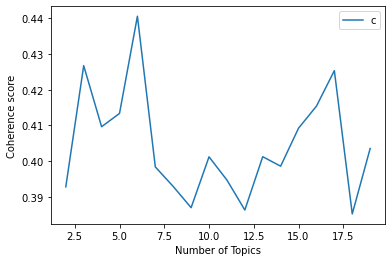

In [ ]:
start,stop,step=2,20,1
plot_graph(dataset,start,stop,step)

In [ ]:
#Singular value decomposition
from sklearn.decomposition import TruncatedSVD
#This process encodes our original data into topic encoded data
svd = TruncatedSVD(n_components = 6)
lsa = svd.fit_transform(BOW)



#Using pandas to look at the output of lsa
topic_encoded_df = pd.DataFrame(lsa, columns=["topic1", "topic2","topic3", "topic4","topic5", "topic6"])
topic_encoded_df["doc"]= body
display(topic_encoded_df[["doc","topic1", "topic2","topic3", "topic4","topic5", "topic6"]])

,doc,topic1,topic2,topic3,topic4,topic5,topic6
0,ad sale boost time warner profit quarterly pro...,2.976176,1.895197,0.276936,-0.405464,0.662501,0.068573
1,dollar gain greenspan speech dollar ha hit hig...,1.828568,2.527628,1.098402,-0.078683,0.771981,-0.279253
2,yukos unit buyer face loan claim owner embattl...,2.429121,0.566177,0.114300,-0.636558,0.351601,0.112410
3,high fuel price hit ba profit british airways ...,3.026080,1.750933,-0.156538,-0.879152,1.199437,-0.611603
4,pernod takeover talk lift domecq shares uk dri...,2.468589,0.911179,-0.233267,-0.910017,0.340990,0.097027
...,...,...,...,...,...,...,...
2720,iddle east respiratory syndrome coronavirus me...,39.015063,39.472672,-27.541910,-49.428828,25.863767,2.146196
2721,background since november perhaps earlier outb...,57.738546,70.915032,7.577440,-31.974898,43.805810,-41.615547
2722,introduction around million people worldwide c...,57.416110,40.895935,-42.441863,-9.660492,-44.383660,-14.186625
2723,study bat serum specimen n collected south afr...,25.706441,13.966656,-13.125611,-18.610052,9.097867,-1.682793


In [ ]:
topic_encoded_df["lable"]=df["lable"]
topic_encoded_df

,topic1,topic2,topic3,topic4,topic5,topic6,doc,lable
0,2.976176,1.895197,0.276936,-0.405464,0.662501,0.068573,ad sale boost time warner profit quarterly pro...,business
1,1.828568,2.527628,1.098402,-0.078683,0.771981,-0.279253,dollar gain greenspan speech dollar ha hit hig...,business
2,2.429121,0.566177,0.114300,-0.636558,0.351601,0.112410,yukos unit buyer face loan claim owner embattl...,business
3,3.026080,1.750933,-0.156538,-0.879152,1.199437,-0.611603,high fuel price hit ba profit british airways ...,business
4,2.468589,0.911179,-0.233267,-0.910017,0.340990,0.097027,pernod takeover talk lift domecq shares uk dri...,business
...,...,...,...,...,...,...,...,...
2720,39.015063,39.472672,-27.541910,-49.428828,25.863767,2.146196,iddle east respiratory syndrome coronavirus me...,Medical
2721,57.738546,70.915032,7.577440,-31.974898,43.805810,-41.615547,background since november perhaps earlier outb...,Medical
2722,57.416110,40.895935,-42.441863,-9.660492,-44.383660,-14.186625,introduction around million people worldwide c...,Medical
2723,25.706441,13.966656,-13.125611,-18.610052,9.097867,-1.682793,study bat serum specimen n collected south afr...,Medical


In [ ]:
encoding_matrix=pd.DataFrame(svd.components_,index=["topic1", "topic2","topic3", "topic4","topic5", "topic6"],columns=dictionary).T



In [ ]:
encoding_matrix.iloc[100:300,:]


,topic1,topic2,topic3,topic4,topic5,topic6
abdication,5.573229e-07,1.994352e-06,2.003810e-07,-0.000002,3.012983e-06,-0.000001
abdomen,3.734257e-04,-1.833675e-04,-1.612125e-05,0.000134,-1.242105e-04,-0.000130
abdominal,1.046361e-02,-7.912221e-03,1.681709e-03,0.004595,-1.737803e-03,0.002353
abdominally,6.483149e-06,4.270823e-05,-3.352288e-05,-0.000003,-5.087053e-05,0.000031
abducted,3.326943e-07,5.918511e-07,-2.462138e-07,-0.000001,3.167762e-08,-0.000001
...,...,...,...,...,...,...
accidently,7.387532e-07,4.283924e-07,-6.302266e-07,-0.000002,3.917081e-07,0.000002
accidents,8.269819e-05,6.003380e-04,7.608297e-04,0.000212,-1.233424e-04,-0.000118
accipiter,1.202272e-05,9.270721e-05,-3.187660e-05,-0.000058,1.409643e-04,0.000400
acclaim,4.853453e-06,1.053944e-05,4.139674e-07,-0.000014,1.472272e-05,0.000004


In [ ]:
encoding_matrix['abs_topic1']=np.abs(encoding_matrix["topic1"])
encoding_matrix['abs_topic2']=np.abs(encoding_matrix["topic2"])
encoding_matrix['abs_topic3']=np.abs(encoding_matrix["topic3"])
encoding_matrix['abs_topic4']=np.abs(encoding_matrix["topic4"])
encoding_matrix['abs_topic5']=np.abs(encoding_matrix["topic5"])
encoding_matrix['abs_topic6']=np.abs(encoding_matrix["topic6"])

encoding_matrix.sort_values('abs_topic6',ascending=False)

,topic1,topic2,topic3,topic4,topic5,topic6,abs_topic1,abs_topic2,abs_topic3,abs_topic4,abs_topic5,abs_topic6
virus,4.027877e-02,1.724687e-01,-1.499897e-01,-3.784623e-01,1.556981e-01,3.547608e-01,4.027877e-02,1.724687e-01,1.499897e-01,3.784623e-01,1.556981e-01,3.547608e-01
rna,1.777005e-02,8.047743e-02,-9.713271e-02,-1.175636e-01,3.845143e-02,3.313546e-01,1.777005e-02,8.047743e-02,9.713271e-02,1.175636e-01,3.845143e-02,3.313546e-01
disease,4.602019e-02,1.397969e-01,5.172014e-02,-4.243920e-02,1.008730e-01,-2.174231e-01,4.602019e-02,1.397969e-01,5.172014e-02,4.243920e-02,1.008730e-01,2.174231e-01
sars,2.575921e-02,6.996823e-02,-3.402617e-02,-1.958626e-01,1.614130e-01,-2.169111e-01,2.575921e-02,6.996823e-02,3.402617e-02,1.958626e-01,1.614130e-01,2.169111e-01
case,4.424452e-02,7.359499e-02,2.918242e-02,-9.795406e-02,1.738827e-01,-1.841204e-01,4.424452e-02,7.359499e-02,2.918242e-02,9.795406e-02,1.738827e-01,1.841204e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
dougie,1.492750e-07,2.478770e-07,4.552237e-08,-6.008150e-07,7.297012e-07,-3.111540e-10,1.492750e-07,2.478770e-07,4.552237e-08,6.008150e-07,7.297012e-07,3.111540e-10
musselburgh,1.492750e-07,2.478770e-07,4.552237e-08,-6.008150e-07,7.297012e-07,-3.111540e-10,1.492750e-07,2.478770e-07,4.552237e-08,6.008150e-07,7.297012e-07,3.111540e-10
racecourse,1.492750e-07,2.478770e-07,4.552237e-08,-6.008150e-07,7.297012e-07,-3.111540e-10,1.492750e-07,2.478770e-07,4.552237e-08,6.008150e-07,7.297012e-07,3.111540e-10
goon,1.492750e-07,2.478770e-07,4.552237e-08,-6.008150e-07,7.297012e-07,-3.111540e-10,1.492750e-07,2.478770e-07,4.552237e-08,6.008150e-07,7.297012e-07,3.111540e-10


In [ ]:
encoding_matrix['abs_topic1']=np.abs(encoding_matrix["topic1"])
encoding_matrix['abs_topic2']=np.abs(encoding_matrix["topic2"])
encoding_matrix['abs_topic3']=np.abs(encoding_matrix["topic3"])
encoding_matrix['abs_topic4']=np.abs(encoding_matrix["topic4"])
encoding_matrix['abs_topic5']=np.abs(encoding_matrix["topic5"])
encoding_matrix['abs_topic6']=np.abs(encoding_matrix["topic6"])

encoding_matrix.sort_values('abs_topic5',ascending=False)

,topic1,topic2,topic3,topic4,topic5,topic6,abs_topic1,abs_topic2,abs_topic3,abs_topic4,abs_topic5,abs_topic6
cell,5.835550e-02,1.999402e-01,-3.149442e-01,5.627935e-03,-4.942109e-01,-1.602720e-01,5.835550e-02,1.999402e-01,3.149442e-01,5.627935e-03,4.942109e-01,1.602720e-01
cd,1.750129e-02,4.238585e-02,-7.446603e-02,-4.637756e-02,-2.554225e-01,-1.088816e-01,1.750129e-02,4.238585e-02,7.446603e-02,4.637756e-02,2.554225e-01,1.088816e-01
protein,4.658801e-02,2.215586e-01,-3.131386e-01,3.934527e-01,2.099010e-01,7.589365e-02,4.658801e-02,2.215586e-01,3.131386e-01,3.934527e-01,2.099010e-01,7.589365e-02
case,4.424452e-02,7.359499e-02,2.918242e-02,-9.795406e-02,1.738827e-01,-1.841204e-01,4.424452e-02,7.359499e-02,2.918242e-02,9.795406e-02,1.738827e-01,1.841204e-01
sars,2.575921e-02,6.996823e-02,-3.402617e-02,-1.958626e-01,1.614130e-01,-2.169111e-01,2.575921e-02,6.996823e-02,3.402617e-02,1.958626e-01,1.614130e-01,2.169111e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
hyypia,3.325521e-06,9.653109e-07,-2.614556e-06,-5.542023e-06,-1.093997e-08,9.700442e-06,3.325521e-06,9.653109e-07,2.614556e-06,5.542023e-06,1.093997e-08,9.700442e-06
paedophilia,1.513686e-07,4.201363e-07,-1.364355e-07,-5.009337e-07,-6.242249e-09,-3.533087e-07,1.513686e-07,4.201363e-07,1.364355e-07,5.009337e-07,6.242249e-09,3.533087e-07
webmaster,1.513686e-07,4.201363e-07,-1.364355e-07,-5.009337e-07,-6.242249e-09,-3.533087e-07,1.513686e-07,4.201363e-07,1.364355e-07,5.009337e-07,6.242249e-09,3.533087e-07
guerrilla,1.513686e-07,4.201363e-07,-1.364355e-07,-5.009337e-07,-6.242249e-09,-3.533087e-07,1.513686e-07,4.201363e-07,1.364355e-07,5.009337e-07,6.242249e-09,3.533087e-07


### summarize all records:

In [ ]:
first_df=pd.read_csv("final_dataset_min.csv")
first_df

,Unnamed: 0,text,lable
0,0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,3,High fuel prices hit BA's profits\n\nBritish A...,business
4,4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...,...
2720,495,M iddle East respiratory syndrome coronavirus ...,Medical
2721,496,Background\n\nSince November 2002 (and perhaps...,Medical
2722,497,INTRODUCTION\n\nAround 350 million people worl...,Medical
2723,498,The Study\n\nBat serum specimens (n = 705) col...,Medical


In [ ]:
from sumy.summarizers.lsa import LsaSummarizer
# Parsing the text string using PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nourh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
original_text=first_df["text"][0]
original_text


'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to si

In [ ]:

parser=PlaintextParser.from_string(original_text,Tokenizer('english'))

In [ ]:
# creating the summarizer
lsa_summarizer=LsaSummarizer()
lsa_summary= lsa_summarizer(parser.document,5)

# Printing the summary
for sentence in lsa_summary:
    print(sentence)

Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.
Time Warner said on Friday that it now owns 8% of search-engine Google.
But its own internet business, AOL, had has mixed fortunes.
Time Warner's fourth quarter profits were slightly better than analysts' expectations.
For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.


In [ ]:
summarize_LSA=[]
for i in tqdm(first_df["text"]):
    summarize_1=[]
    original_text=i
    parser=PlaintextParser.from_string(original_text,Tokenizer('english'))
    lsa_summary= lsa_summarizer(parser.document,5)
    for sentence in lsa_summary:
        summarize_1.append(str(sentence))
    summarize_LSA.append(summarize_1)

  0%|          | 0/2725 [00:00<?, ?it/s]

C:\Users\Nourh\anaconda3\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning: Number of words (1) is lower than number of sentences (2). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))


In [ ]:
len(summarize_LSA)

2725

In [ ]:
df

,Unnamed: 0,clean_text4,lable,tokenized_sents,summarized_T5
0,0,ad sale boost time warner profit quarterly pro...,business,"['ad', 'sale', 'boost', 'time', 'warner', 'pro...",google profit quarterly profit us medium giant...
1,1,dollar gain greenspan speech dollar ha hit hig...,business,"['dollar', 'gain', 'greenspan', 'speech', 'dol...",dollar gain greenspan speech dollar ha hit hig...
2,2,yukos unit buyer face loan claim owner embattl...,business,"['yukos', 'unit', 'buyer', 'face', 'loan', 'cl...",yukos unit buyer face loan claim owner embattl...
3,3,high fuel price hit ba profit british airways ...,business,"['high', 'fuel', 'price', 'hit', 'ba', 'profit...",ba profit british airways ha blamed high fuel ...
4,4,pernod takeover talk lift domecq shares uk dri...,business,"['pernod', 'takeover', 'talk', 'lift', 'domecq...",pernod takeover talk lift domecq shares uk dri...
...,...,...,...,...,...
2720,2720,iddle east respiratory syndrome coronavirus me...,Medical,"['iddle', 'east', 'respiratory', 'syndrome', '...",iddle east respiratory syndrome coronavirus me...
2721,2721,background since november perhaps earlier outb...,Medical,"['background', 'since', 'november', 'perhaps',...",guangzhou infected several person hotel kow lo...
2722,2722,introduction around million people worldwide c...,Medical,"['introduction', 'around', 'million', 'people'...",around million people worldwide chronically in...
2723,2723,study bat serum specimen n collected south afr...,Medical,"['study', 'bat', 'serum', 'specimen', 'n', 'co...",study bat serum specimen n collected south afr...


In [ ]:
df["summarized_LSA"]=summarize_LSA

In [ ]:
df

,Unnamed: 0,clean_text4,lable,tokenized_sents,summarized_T5,summarized_LSA
0,0,ad sale boost time warner profit quarterly pro...,business,"['ad', 'sale', 'boost', 'time', 'warner', 'pro...",google profit quarterly profit us medium giant...,[Its profits were buoyed by one-off gains whic...
1,1,dollar gain greenspan speech dollar ha hit hig...,business,"['dollar', 'gain', 'greenspan', 'speech', 'dol...",dollar gain greenspan speech dollar ha hit hig...,[And Alan Greenspan highlighted the US governm...
2,2,yukos unit buyer face loan claim owner embattl...,business,"['yukos', 'unit', 'buyer', 'face', 'loan', 'cl...",yukos unit buyer face loan claim owner embattl...,[Yukos' owner Menatep Group says it will ask R...
3,3,high fuel price hit ba profit british airways ...,business,"['high', 'fuel', 'price', 'hit', 'ba', 'profit...",ba profit british airways ha blamed high fuel ...,[British Airways has blamed high fuel prices f...
4,4,pernod takeover talk lift domecq shares uk dri...,business,"['pernod', 'takeover', 'talk', 'lift', 'domecq...",pernod takeover talk lift domecq shares uk dri...,[Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...,...,...
2720,2720,iddle east respiratory syndrome coronavirus me...,Medical,"['iddle', 'east', 'respiratory', 'syndrome', '...",iddle east respiratory syndrome coronavirus me...,[It was speculated that zoonotic introductions...
2721,2721,background since november perhaps earlier outb...,Medical,"['background', 'since', 'november', 'perhaps',...",guangzhou infected several person hotel kow lo...,"[Both epidemics would spread in parallel, and ..."
2722,2722,introduction around million people worldwide c...,Medical,"['introduction', 'around', 'million', 'people'...",around million people worldwide chronically in...,[We used an overlapping 9-mer peptide pool cov...
2723,2723,study bat serum specimen n collected south afr...,Medical,"['study', 'bat', 'serum', 'specimen', 'n', 'co...",study bat serum specimen n collected south afr...,[Negative bat serum was obtained from a captiv...


In [ ]:
df["original_text"]=first_df["text"]
df

,Unnamed: 0,clean_text4,lable,tokenized_sents,summarized_T5,summarized_LSA,original_text
0,0,ad sale boost time warner profit quarterly pro...,business,"['ad', 'sale', 'boost', 'time', 'warner', 'pro...",google profit quarterly profit us medium giant...,[Its profits were buoyed by one-off gains whic...,Ad sales boost Time Warner profit\n\nQuarterly...
1,1,dollar gain greenspan speech dollar ha hit hig...,business,"['dollar', 'gain', 'greenspan', 'speech', 'dol...",dollar gain greenspan speech dollar ha hit hig...,[And Alan Greenspan highlighted the US governm...,Dollar gains on Greenspan speech\n\nThe dollar...
2,2,yukos unit buyer face loan claim owner embattl...,business,"['yukos', 'unit', 'buyer', 'face', 'loan', 'cl...",yukos unit buyer face loan claim owner embattl...,[Yukos' owner Menatep Group says it will ask R...,Yukos unit buyer faces loan claim\n\nThe owner...
3,3,high fuel price hit ba profit british airways ...,business,"['high', 'fuel', 'price', 'hit', 'ba', 'profit...",ba profit british airways ha blamed high fuel ...,[British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits\n\nBritish A...
4,4,pernod takeover talk lift domecq shares uk dri...,business,"['pernod', 'takeover', 'talk', 'lift', 'domecq...",pernod takeover talk lift domecq shares uk dri...,[Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq\n\nShares in...
...,...,...,...,...,...,...,...
2720,2720,iddle east respiratory syndrome coronavirus me...,Medical,"['iddle', 'east', 'respiratory', 'syndrome', '...",iddle east respiratory syndrome coronavirus me...,[It was speculated that zoonotic introductions...,M iddle East respiratory syndrome coronavirus ...
2721,2721,background since november perhaps earlier outb...,Medical,"['background', 'since', 'november', 'perhaps',...",guangzhou infected several person hotel kow lo...,"[Both epidemics would spread in parallel, and ...",Background\n\nSince November 2002 (and perhaps...
2722,2722,introduction around million people worldwide c...,Medical,"['introduction', 'around', 'million', 'people'...",around million people worldwide chronically in...,[We used an overlapping 9-mer peptide pool cov...,INTRODUCTION\n\nAround 350 million people worl...
2723,2723,study bat serum specimen n collected south afr...,Medical,"['study', 'bat', 'serum', 'specimen', 'n', 'co...",study bat serum specimen n collected south afr...,[Negative bat serum was obtained from a captiv...,The Study\n\nBat serum specimens (n = 705) col...


In [ ]:
df.to_csv("df2summarized_LSA_T5_with+original.csv")

In [ ]:
df

,Unnamed: 0,clean_text4,lable,tokenized_sents,summarized_T5,summarized_LSA,original_text
0,0,ad sale boost time warner profit quarterly pro...,business,"['ad', 'sale', 'boost', 'time', 'warner', 'pro...",google profit quarterly profit us medium giant...,[Its profits were buoyed by one-off gains whic...,Ad sales boost Time Warner profit\n\nQuarterly...
1,1,dollar gain greenspan speech dollar ha hit hig...,business,"['dollar', 'gain', 'greenspan', 'speech', 'dol...",dollar gain greenspan speech dollar ha hit hig...,[And Alan Greenspan highlighted the US governm...,Dollar gains on Greenspan speech\n\nThe dollar...
2,2,yukos unit buyer face loan claim owner embattl...,business,"['yukos', 'unit', 'buyer', 'face', 'loan', 'cl...",yukos unit buyer face loan claim owner embattl...,[Yukos' owner Menatep Group says it will ask R...,Yukos unit buyer faces loan claim\n\nThe owner...
3,3,high fuel price hit ba profit british airways ...,business,"['high', 'fuel', 'price', 'hit', 'ba', 'profit...",ba profit british airways ha blamed high fuel ...,[British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits\n\nBritish A...
4,4,pernod takeover talk lift domecq shares uk dri...,business,"['pernod', 'takeover', 'talk', 'lift', 'domecq...",pernod takeover talk lift domecq shares uk dri...,[Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq\n\nShares in...
...,...,...,...,...,...,...,...
2720,2720,iddle east respiratory syndrome coronavirus me...,Medical,"['iddle', 'east', 'respiratory', 'syndrome', '...",iddle east respiratory syndrome coronavirus me...,[It was speculated that zoonotic introductions...,M iddle East respiratory syndrome coronavirus ...
2721,2721,background since november perhaps earlier outb...,Medical,"['background', 'since', 'november', 'perhaps',...",guangzhou infected several person hotel kow lo...,"[Both epidemics would spread in parallel, and ...",Background\n\nSince November 2002 (and perhaps...
2722,2722,introduction around million people worldwide c...,Medical,"['introduction', 'around', 'million', 'people'...",around million people worldwide chronically in...,[We used an overlapping 9-mer peptide pool cov...,INTRODUCTION\n\nAround 350 million people worl...
2723,2723,study bat serum specimen n collected south afr...,Medical,"['study', 'bat', 'serum', 'specimen', 'n', 'co...",study bat serum specimen n collected south afr...,[Negative bat serum was obtained from a captiv...,The Study\n\nBat serum specimens (n = 705) col...


# visualize wordcloud for each unique lable

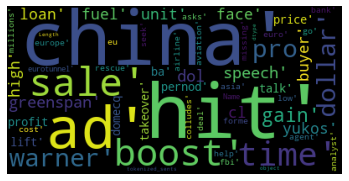

In [ ]:
# Generate a word cloud image for business

text =df.iloc[:500,3]
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

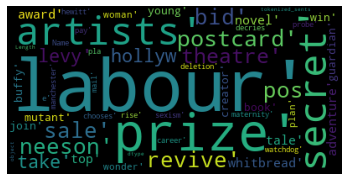

In [ ]:
# Generate a word cloud image for entertainment

text =df.iloc[520:900,3]
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

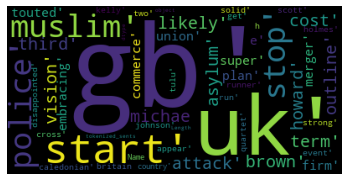

In [ ]:
# Generate a word cloud image for politics

text =df.iloc[1000:1400,3]
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

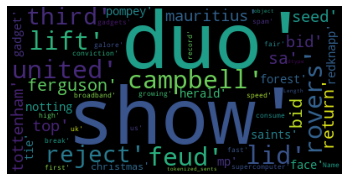

In [ ]:
# Generate a word cloud image for sport

text =df.iloc[1500:2000,3]
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

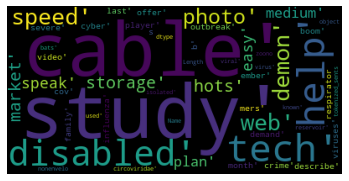

In [ ]:
# Generate a word cloud image for tech

text =df.iloc[2100:2300,3]
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

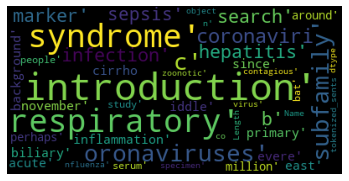

In [ ]:
# Generate a word cloud image for medical

text =df.iloc[2400:,3]
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## load test summarived data- human written

In [ ]:
file_names = os.listdir('Summaries/business/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('business/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
business_sum = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
business_sum["lable"]="business"
business_sum.drop("file_name",axis=1,inplace=True)

business_sum

,text,lable
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
505,Trial begins of Spain's top banker\n\nThe tria...,business
506,UK economy ends year with spurt\n\nThe UK econ...,business
507,HealthSouth ex-boss goes on trial\n\nThe forme...,business
508,Euro firms miss out on optimism\n\nMore than 9...,business


In [ ]:
file_names = os.listdir('Summaries/entertainment/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('entertainment/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
entertainment_sum = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
entertainment_sum["lable"]="entertainment"
entertainment_sum.drop("file_name",axis=1,inplace=True)

entertainment_sum

,text,lable
0,Gallery unveils interactive tree\n\nA Christma...,entertainment
1,Jarre joins fairytale celebration\n\nFrench mu...,entertainment
2,Musical treatment for Capra film\n\nThe classi...,entertainment
3,Richard and Judy choose top books\n\nThe 10 au...,entertainment
4,Poppins musical gets flying start\n\nThe stage...,entertainment
...,...,...
381,Last Star Wars 'not for children'\n\nThe sixth...,entertainment
382,French honour for director Parker\n\nBritish f...,entertainment
383,Robots march to US cinema summit\n\nAnimated m...,entertainment
384,Hobbit picture 'four years away'\n\nLord of th...,entertainment


In [ ]:
file_names = os.listdir('Summaries/politics/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('politics/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
politics_sum = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
politics_sum["lable"]="politics"
politics_sum.drop("file_name",axis=1,inplace=True)
politics_sum

,text,lable
0,Labour plans maternity pay rise\n\nMaternity p...,politics
1,Watchdog probes e-mail deletions\n\nThe inform...,politics
2,Hewitt decries 'career sexism'\n\nPlans to ext...,politics
3,Labour chooses Manchester\n\nThe Labour Party ...,politics
4,Brown ally rejects Budget spree\n\nChancellor ...,politics
...,...,...
412,Sainsbury's Labour election gift\n\nScience Mi...,politics
413,Blair 'up for it' ahead of poll\n\nTony Blair ...,politics
414,Labour MP praises Tory campaign\n\nThe Conserv...,politics
415,Top Tories on Lib Dem 'hit list'\n\nThe Libera...,politics


In [ ]:
file_names = os.listdir('Summaries/sport/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('sport/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
sport_sum = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
sport_sum["lable"]="sport"
sport_sum.drop("file_name",axis=1,inplace=True)
sport_sum

,text,lable
0,Claxton hunting first major medal\n\nBritish h...,sport
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,sport
2,Greene sets sights on world title\n\nMaurice G...,sport
3,IAAF launches fight against drugs\n\nThe IAAF ...,sport
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",sport
...,...,...
506,Big guns ease through in San Jose\n\nTop-seede...,sport
507,Almagro continues Spanish surge\n\nUnseeded Ni...,sport
508,Melzer shocks Agassi in San Jose\n\nSecond see...,sport
509,Mirza makes Indian tennis history\n\nTeenager ...,sport


In [ ]:
file_names = os.listdir('Summaries/tech/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('tech/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
tech_sum = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
tech_sum["lable"]="tech"
tech_sum.drop("file_name",axis=1,inplace=True)
tech_sum

,text,lable
0,Ink helps drive democracy in Asia\n\nThe Kyrgy...,tech
1,China net cafe culture crackdown\n\nChinese au...,tech
2,Microsoft seeking spyware trojan\n\nMicrosoft ...,tech
3,Digital guru floats sub-$100 PC\n\nNicholas Ne...,tech
4,Technology gets the creative bug\n\nThe hi-tec...,tech
...,...,...
396,BT program to beat dialler scams\n\nBT is intr...,tech
397,Spam e-mails tempt net shoppers\n\nComputer us...,tech
398,Be careful how you code\n\nA new European dire...,tech
399,US cyber security chief resigns\n\nThe man mak...,tech


In [ ]:
import io
with io.open("med_records2.txt", "w", encoding="utf-8") as f:
    for i in df["original_text"]:
        f.write(i)
        f.write("\n\n\n\n")
        f.write("################################################################")

In [ ]:
final_df_sum = pd.concat([business_sum,entertainment_sum,politics_sum,sport_sum,tech_sum])
final_df_sum

,text,lable
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
396,BT program to beat dialler scams\n\nBT is intr...,tech
397,Spam e-mails tempt net shoppers\n\nComputer us...,tech
398,Be careful how you code\n\nA new European dire...,tech
399,US cyber security chief resigns\n\nThe man mak...,tech


In [ ]:
df_testind_compare=df.iloc[:2274,4:6]
df_testind_compare

,summarized_T5,summarized_LSA
0,google profit quarterly profit us medium giant...,[Its profits were buoyed by one-off gains whic...
1,dollar gain greenspan speech dollar ha hit hig...,[And Alan Greenspan highlighted the US governm...
2,yukos unit buyer face loan claim owner embattl...,[Yukos' owner Menatep Group says it will ask R...
3,ba profit british airways ha blamed high fuel ...,[British Airways has blamed high fuel prices f...
4,pernod takeover talk lift domecq shares uk dri...,[Shares in UK drinks and food firm Allied Dome...
...,...,...
2269,eukaryote cell gene assigned function share co...,[More than 75% of the genes have an assigned f...
2270,eu landfill directive rough sbe cannot landfil...,[The SBE also could be added at 0.5 to 2 % as ...
2271,mers coronavirus cov include recent direct con...,[We also genetically sequenced MERS-CoV from r...
2272,asia pacifi c region ha highlighted asia pacif...,[Those who did not respond were reminded by le...


In [ ]:
df_testind_compare["lable"]=df.lable
df_testind_compare

,summarized_T5,summarized_LSA,lable
0,google profit quarterly profit us medium giant...,[Its profits were buoyed by one-off gains whic...,business
1,dollar gain greenspan speech dollar ha hit hig...,[And Alan Greenspan highlighted the US governm...,business
2,yukos unit buyer face loan claim owner embattl...,[Yukos' owner Menatep Group says it will ask R...,business
3,ba profit british airways ha blamed high fuel ...,[British Airways has blamed high fuel prices f...,business
4,pernod takeover talk lift domecq shares uk dri...,[Shares in UK drinks and food firm Allied Dome...,business
...,...,...,...
2269,eukaryote cell gene assigned function share co...,[More than 75% of the genes have an assigned f...,Medical
2270,eu landfill directive rough sbe cannot landfil...,[The SBE also could be added at 0.5 to 2 % as ...,Medical
2271,mers coronavirus cov include recent direct con...,[We also genetically sequenced MERS-CoV from r...,Medical
2272,asia pacifi c region ha highlighted asia pacif...,[Those who did not respond were reminded by le...,Medical


In [ ]:
df_testind_compare['clean_text_for_LSA'] = df_testind_compare['summarized_LSA'].apply(lambda x: "".join([str(elem) for elem in x]))
df_testind_compare

,summarized_T5,summarized_LSA,lable,clean_text_for_LSA
0,google profit quarterly profit us medium giant...,[Its profits were buoyed by one-off gains whic...,business,Its profits were buoyed by one-off gains which...
1,dollar gain greenspan speech dollar ha hit hig...,[And Alan Greenspan highlighted the US governm...,business,And Alan Greenspan highlighted the US governme...
2,yukos unit buyer face loan claim owner embattl...,[Yukos' owner Menatep Group says it will ask R...,business,Yukos' owner Menatep Group says it will ask Ro...
3,ba profit british airways ha blamed high fuel ...,[British Airways has blamed high fuel prices f...,business,British Airways has blamed high fuel prices fo...
4,pernod takeover talk lift domecq shares uk dri...,[Shares in UK drinks and food firm Allied Dome...,business,Shares in UK drinks and food firm Allied Domec...
...,...,...,...,...
2269,eukaryote cell gene assigned function share co...,[More than 75% of the genes have an assigned f...,Medical,More than 75% of the genes have an assigned fu...
2270,eu landfill directive rough sbe cannot landfil...,[The SBE also could be added at 0.5 to 2 % as ...,Medical,The SBE also could be added at 0.5 to 2 % as a...
2271,mers coronavirus cov include recent direct con...,[We also genetically sequenced MERS-CoV from r...,Medical,We also genetically sequenced MERS-CoV from re...
2272,asia pacifi c region ha highlighted asia pacif...,[Those who did not respond were reminded by le...,Medical,Those who did not respond were reminded by let...


In [ ]:
df_testind_compare.to_csv("df_testind_compare.csv")

# pre processing testing datasets

## manually summarizd midical records


In [ ]:

# import pandas as pd
file_name = 'medfilenew.xlsx' 
medical_rec_df = pd.read_excel(file_name, index_col=0)
medical_rec_df.head()

,text,lable
index,,
1,Profits boosted by sales of high-speed interne...,Medical
2,Dollar hits highest level against euro in almo...,Medical
3,Yukos owner Menatep Group says it will ask Ros...,Medical
4,BA last year introduced a fuel surcharge for p...,Medical
5,Japan's economy teeters on brink of technical ...,Medical


In [ ]:

#preprocess medical records
stop = stopwords.words('english')

medical_rec_df['lem_sentences'] = medical_rec_df.text.apply(lemmatize_text)
medical_rec_df['clean_text']=medical_rec_df['lem_sentences'].apply(lambda x : remove_stopwords(x))  
medical_rec_df['textt_to_be_clean'] = medical_rec_df['clean_text'].apply(lambda x: ' '.join([i for i in x]))

medical_rec_df['clean_text2']=preprocess(medical_rec_df['textt_to_be_clean'])
medical_rec_df['clean_text2']=clean_sentences(medical_rec_df['clean_text2'])
medical_rec_df['clean_text3']=preprocess(medical_rec_df['clean_text2'])
medical_rec_df['clean_text3']=clean_sentences(medical_rec_df['clean_text3'])

medical_rec_df['clean_text4'] = medical_rec_df['clean_text3'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
medical_rec_df


C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace("(<br/>)", "")
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(<a).*(>).*(</a>)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&amp)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&gt)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:6: FutureWarning: The default value of regex will change from True to False in a futur

,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2,clean_text3,clean_text4
index,,,,,,,,
1,Profits boosted by sales of high-speed interne...,Medical,"[Profits, boosted, by, sale, of, high-speed, i...","[Profits, boosted, sale, high-speed, internet,...",Profits boosted sale high-speed internet conne...,profits boosted sale high speed internet conne...,profits boosted sale high speed internet conne...,profits boosted sale high speed internet conne...
2,Dollar hits highest level against euro in almo...,Medical,"[Dollar, hit, highest, level, against, euro, i...","[Dollar, hit, highest, level, euro, almost, th...",Dollar hit highest level euro almost three mon...,dollar hit highest level euro almost three mon...,dollar hit highest level euro almost three mon...,dollar hit highest level euro almost three mon...
3,Yukos owner Menatep Group says it will ask Ros...,Medical,"[Yukos, owner, Menatep, Group, say, it, will, ...","[Yukos, owner, Menatep, Group, say, ask, Rosne...",Yukos owner Menatep Group say ask Rosneft repa...,yukos owner menatep group say ask rosneft repa...,yukos owner menatep group say ask rosneft repa...,yukos owner menatep group say ask rosneft repa...
4,BA last year introduced a fuel surcharge for p...,Medical,"[BA, last, year, introduced, a, fuel, surcharg...","[BA, last, year, introduced, fuel, surcharge, ...",BA last year introduced fuel surcharge passeng...,ba last year introduced fuel surcharge passeng...,ba last year introduced fuel surcharge passeng...,ba last year introduced fuel surcharge passeng...
5,Japan's economy teeters on brink of technical ...,Medical,"[Japan's, economy, teeter, on, brink, of, tech...","[Japan's, economy, teeter, brink, technical, r...",Japan's economy teeter brink technical recessi...,japan s economy teeter brink technical recessi...,japan s economy teeter brink technical recessi...,japan economy teeter brink technical recession...
6,"US firms added 146,000 jobs in January, below ...",Medical,"[US, firm, added, 146,000, job, in, January,, ...","[US, firm, added, 146,000, job, January,, mark...","US firm added 146,000 job January, market expe...",us firm added job january market expectation b...,us firm added job january market expectation b...,us firm added job january market expectation f...
7,India attends G7 meeting of leading industrial...,Medical,"[India, attends, G7, meeting, of, leading, ind...","[India, attends, G7, meeting, leading, industr...",India attends G7 meeting leading industrialise...,india attends g meeting leading industrialised...,india attends g meeting leading industrialised...,india attends g meeting leading industrialised...
8,Ethiopia produced 14.27 million tonnes of crop...,Medical,"[Ethiopia, produced, 14.27, million, tonne, of...","[Ethiopia, produced, 14.27, million, tonne, cr...",Ethiopia produced 14.27 million tonne crop 200...,ethiopia produced million tonne crop higher re...,ethiopia produced million tonne crop higher re...,ethiopia produced million tonne crop higher re...
9,Court rules case could not be brought under fe...,Medical,"[Court, rule, case, could, not, be, brought, u...","[Court, rule, case, could, brought, federal, a...",Court rule case could brought federal anti-rac...,court rule case could brought federal anti rac...,court rule case could brought federal anti rac...,court rule case could brought federal anti rac...


## preprocessing the other dataset with expert summariation

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

final_df_sum['lem_sentences'] = final_df_sum.text.apply(lemmatize_text)


In [ ]:
final_df_sum['clean_text']=final_df_sum['lem_sentences'].apply(lambda x : remove_stopwords(x))  



In [ ]:
final_df_sum['textt_to_be_clean'] = final_df_sum['clean_text'].apply(lambda x: ' '.join([i for i in x]))


In [ ]:
final_df_sum['clean_text2']=preprocess(final_df_sum['textt_to_be_clean'])

C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace("(<br/>)", "")
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(<a).*(>).*(</a>)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&amp)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&gt)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:6: FutureWarning: The default value of regex will change from True to False in a futur

In [ ]:
final_df_sum['clean_text2']=clean_sentences(final_df_sum['clean_text2'])


In [ ]:
final_df_sum['clean_text3']=preprocess(final_df_sum['clean_text2'])


C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace("(<br/>)", "")
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(<a).*(>).*(</a>)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&amp)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewTxt = ReviewTxt.str.replace('(&gt)', '')
C:\Users\Nourh\AppData\Local\Temp\ipykernel_2764\4100068396.py:6: FutureWarning: The default value of regex will change from True to False in a futur

In [ ]:
final_df_sum['clean_text3']=clean_sentences(final_df_sum['clean_text3'])


In [ ]:
stop = stopwords.words('english')

final_df_sum['clean_text4'] = final_df_sum['clean_text3'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
final_df_sum

,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2,clean_text3,clean_text4
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,"[Ad, sale, boost, Time, Warner, profit, Quarte...","[Ad, sale, boost, Time, Warner, profit, Quarte...",Ad sale boost Time Warner profit Quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,"[Dollar, gain, on, Greenspan, speech, The, dol...","[Dollar, gain, Greenspan, speech, The, dollar,...",Dollar gain Greenspan speech The dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech the dollar ha hit...,dollar gain greenspan speech dollar ha hit hig...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,"[Yukos, unit, buyer, face, loan, claim, The, o...","[Yukos, unit, buyer, face, loan, claim, The, o...",Yukos unit buyer face loan claim The owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim the owner emb...,yukos unit buyer face loan claim owner embattl...
3,High fuel prices hit BA's profits\n\nBritish A...,business,"[High, fuel, price, hit, BA's, profit, British...","[High, fuel, price, hit, BA's, profit, British...",High fuel price hit BA's profit British Airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba s profit british airway...,high fuel price hit ba profit british airways ...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,"[Pernod, takeover, talk, lift, Domecq, Shares,...","[Pernod, takeover, talk, lift, Domecq, Shares,...",Pernod takeover talk lift Domecq Shares UK dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...,pernod takeover talk lift domecq shares uk dri...
...,...,...,...,...,...,...,...,...
396,BT program to beat dialler scams\n\nBT is intr...,tech,"[BT, program, to, beat, dialler, scam, BT, is,...","[BT, program, beat, dialler, scam, BT, introdu...",BT program beat dialler scam BT introducing tw...,bt program beat dialler scam bt introducing tw...,bt program beat dialler scam bt introducing tw...,bt program beat dialler scam bt introducing tw...
397,Spam e-mails tempt net shoppers\n\nComputer us...,tech,"[Spam, e-mail, tempt, net, shopper, Computer, ...","[Spam, e-mail, tempt, net, shopper, Computer, ...",Spam e-mail tempt net shopper Computer user ac...,spam e mail tempt net shopper computer user ac...,spam e mail tempt net shopper computer user ac...,spam e mail tempt net shopper computer user ac...
398,Be careful how you code\n\nA new European dire...,tech,"[Be, careful, how, you, code, A, new, European...","[Be, careful, code, A, new, European, directiv...",Be careful code A new European directive could...,be careful code a new european directive could...,be careful code a new european directive could...,careful code new european directive could put ...
399,US cyber security chief resigns\n\nThe man mak...,tech,"[US, cyber, security, chief, resigns, The, man...","[US, cyber, security, chief, resigns, The, man...",US cyber security chief resigns The man making...,us cyber security chief resigns the man making...,us cyber security chief resigns the man making...,us cyber security chief resigns man making sur...


In [ ]:
final_df_sum=pd.concat([medical_rec_df,final_df_sum])
final_df_sum

,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2,clean_text3,clean_text4
1,Profits boosted by sales of high-speed interne...,Medical,"[Profits, boosted, by, sale, of, high-speed, i...","[Profits, boosted, sale, high-speed, internet,...",Profits boosted sale high-speed internet conne...,profits boosted sale high speed internet conne...,profits boosted sale high speed internet conne...,profits boosted sale high speed internet conne...
2,Dollar hits highest level against euro in almo...,Medical,"[Dollar, hit, highest, level, against, euro, i...","[Dollar, hit, highest, level, euro, almost, th...",Dollar hit highest level euro almost three mon...,dollar hit highest level euro almost three mon...,dollar hit highest level euro almost three mon...,dollar hit highest level euro almost three mon...
3,Yukos owner Menatep Group says it will ask Ros...,Medical,"[Yukos, owner, Menatep, Group, say, it, will, ...","[Yukos, owner, Menatep, Group, say, ask, Rosne...",Yukos owner Menatep Group say ask Rosneft repa...,yukos owner menatep group say ask rosneft repa...,yukos owner menatep group say ask rosneft repa...,yukos owner menatep group say ask rosneft repa...
4,BA last year introduced a fuel surcharge for p...,Medical,"[BA, last, year, introduced, a, fuel, surcharg...","[BA, last, year, introduced, fuel, surcharge, ...",BA last year introduced fuel surcharge passeng...,ba last year introduced fuel surcharge passeng...,ba last year introduced fuel surcharge passeng...,ba last year introduced fuel surcharge passeng...
5,Japan's economy teeters on brink of technical ...,Medical,"[Japan's, economy, teeter, on, brink, of, tech...","[Japan's, economy, teeter, brink, technical, r...",Japan's economy teeter brink technical recessi...,japan s economy teeter brink technical recessi...,japan s economy teeter brink technical recessi...,japan economy teeter brink technical recession...
...,...,...,...,...,...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech,"['BT', 'program', 'to', 'beat', 'dialler', 'sc...","['BT', 'program', 'beat', 'dialler', 'scam', '...",BT program beat dialler scam BT introducing tw...,bt program beat dialler scam bt introducing tw...,bt program beat dialler scam bt introducing tw...,bt program beat dialler scam bt introducing tw...
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech,"['Spam', 'e-mail', 'tempt', 'net', 'shopper', ...","['Spam', 'e-mail', 'tempt', 'net', 'shopper', ...",Spam e-mail tempt net shopper Computer user ac...,spam e mail tempt net shopper computer user ac...,spam e mail tempt net shopper computer user ac...,spam e mail tempt net shopper computer user ac...
2222,Be careful how you code\n\nA new European dire...,tech,"['Be', 'careful', 'how', 'you', 'code', 'A', '...","['Be', 'careful', 'code', 'A', 'new', 'Europea...",Be careful code A new European directive could...,be careful code a new european directive could...,be careful code a new european directive could...,careful code new european directive could put ...
2223,US cyber security chief resigns\n\nThe man mak...,tech,"['US', 'cyber', 'security', 'chief', 'resigns'...","['US', 'cyber', 'security', 'chief', 'resigns'...",US cyber security chief resigns The man making...,us cyber security chief resigns the man making...,us cyber security chief resigns the man making...,us cyber security chief resigns man making sur...


In [ ]:
final_df_sum.to_csv("final_df_sum.csv")

In [ ]:
df_testind_compare

,summarized_T5,summarized_LSA,lable,clean_text_for_LSA
0,google profit quarterly profit us medium giant...,[Its profits were buoyed by one-off gains whic...,business,Its profits were buoyed by one-off gains which...
1,dollar gain greenspan speech dollar ha hit hig...,[And Alan Greenspan highlighted the US governm...,business,And Alan Greenspan highlighted the US governme...
2,yukos unit buyer face loan claim owner embattl...,[Yukos' owner Menatep Group says it will ask R...,business,Yukos' owner Menatep Group says it will ask Ro...
3,ba profit british airways ha blamed high fuel ...,[British Airways has blamed high fuel prices f...,business,British Airways has blamed high fuel prices fo...
4,pernod takeover talk lift domecq shares uk dri...,[Shares in UK drinks and food firm Allied Dome...,business,Shares in UK drinks and food firm Allied Domec...
...,...,...,...,...
2269,eukaryote cell gene assigned function share co...,[More than 75% of the genes have an assigned f...,Medical,More than 75% of the genes have an assigned fu...
2270,eu landfill directive rough sbe cannot landfil...,[The SBE also could be added at 0.5 to 2 % as ...,Medical,The SBE also could be added at 0.5 to 2 % as a...
2271,mers coronavirus cov include recent direct con...,[We also genetically sequenced MERS-CoV from r...,Medical,We also genetically sequenced MERS-CoV from re...
2272,asia pacifi c region ha highlighted asia pacif...,[Those who did not respond were reminded by le...,Medical,Those who did not respond were reminded by let...


In [ ]:
final_df_sum=pd.read_csv("final_df_sum.csv")
df_testind_compare=pd.read_csv("df_testind_compare.csv")

# Evaluation

In [ ]:
ref=final_df_sum.clean_text4
T5=df_testind_compare.summarized_T5
LSAS=df_testind_compare.clean_text_for_LSA

In [ ]:
# pip install Rouge

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from rouge import Rouge
r = Rouge()


In [ ]:
r.get_scores(ref[0],LSAS[0])

[{'rouge-1': {'r': 0.11428571428571428,
   'p': 0.17777777777777778,
   'f': 0.13913043001890374},
  'rouge-2': {'r': 0.013333333333333334,
   'p': 0.02040816326530612,
   'f': 0.016129027477889035},
  'rouge-l': {'r': 0.11428571428571428,
   'p': 0.17777777777777778,
   'f': 0.13913043001890374}}]

In [ ]:
r.get_scores(ref[0],T5[0])

[{'rouge-1': {'r': 0.4642857142857143,
   'p': 0.5777777777777777,
   'f': 0.5148514802078229},
  'rouge-2': {'r': 0.3013698630136986,
   'p': 0.4489795918367347,
   'f': 0.36065573289841446},
  'rouge-l': {'r': 0.42857142857142855,
   'p': 0.5333333333333333,
   'f': 0.4752475198117832}}]

#ROUGE-L measures the longest common subsequence (LCS) between our model output and reference.
#The get_scores method returns three metrics, ROUGE-N using a unigram (ROUGE-1) and a bigram (ROUGE-2) — and ROUGE-L.

In [ ]:
# pip install rouge_score

## calculating rouge score for all dataset for T5

In [ ]:
from rouge_score import rouge_scorer
hyp =T5
ref =ref

scorer = rouge_scorer.RougeScorer(['rouge1'])

results = {'precision': [], 'recall': [], 'fmeasure': []}

for (h, r) in zip(hyp, ref):
    # computing the ROUGE
    score = scorer.score(h, r)
    # separating the measurements
    precision, recall, fmeasure = score['rouge1']
    # add them to the proper list in the dictionary
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['fmeasure'].append(fmeasure)

In [ ]:
sum(results['precision'])/len(results['precision'])

0.042155491368160346

In [ ]:
sum(results['recall'])/len(results['recall'])

0.12120731472004674

In [ ]:
results['precision'][0]

0.6

In [ ]:
results['recall'][0]

0.39473684210526316

## calculating rouge score for all dataset for LSA

In [ ]:
from rouge_score import rouge_scorer
hyp =LSAS
ref =ref

scorer = rouge_scorer.RougeScorer(['rouge1'])

results = {'precision': [], 'recall': [], 'fmeasure': []}

for (h, r) in zip(hyp, ref):
    # computing the ROUGE
    score = scorer.score(h, r)
    # separating the measurements
    precision, recall, fmeasure = score['rouge1']
    # add them to the proper list in the dictionary
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['fmeasure'].append(fmeasure)

In [ ]:
results['precision'][0]

0.46

In [ ]:
results['recall'][0]

0.2804878048780488

## Evaluating using BLEU for LSA

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
import argparse

reference = ref
candidate = LSAS

if len(reference) != len(candidate):
    raise ValueError('The number of sentences in both files do not match.')

score = 0.

for i in range(len(reference)):
    score += sentence_bleu([reference[i].strip().split()], candidate[i].strip().split())

score /= len(reference)
print("The bleu score is: "+str(score))

C:\Users\Nourh\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\Nourh\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\Nourh\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

The bleu score is: 5.699649950091472e-86


## Evaluating using BLEU for LSA

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
import argparse

reference = ref
candidate = T5

if len(reference) != len(candidate):
    raise ValueError('The number of sentences in both files do not match.')

score = 0.

for i in range(len(reference)):
    score += sentence_bleu([reference[i].strip().split()], candidate[i].strip().split())

score /= len(reference)
print("The bleu score is: "+str(score))

The bleu score is: 0.00038997342954977336


#classification

In [ ]:
data = pd.read_csv('/content/df2summarized_LSA_T5_with+original.csv')


  ============= naive bayes testing accuracy ==============  

0.9504587155963303

  ============= naive bayes confusion matrix ==============  


  ============= naive bayes classification report ==============  

               precision    recall  f1-score   support

     business       1.00      0.98      0.99       100
entertainment       0.87      0.98      0.92       102
     politics       0.98      0.84      0.91        77
        sport       0.94      0.93      0.93        84
         tech       0.96      1.00      0.98       102
      Medical       0.97      0.94      0.96        80

     accuracy                           0.95       545
    macro avg       0.96      0.95      0.95       545
 weighted avg       0.95      0.95      0.95       545

Misclassified Labels Are:

['sport' 'tech' 'politics' 'business' 'business' 'business' 'business'
 'business' 'business' 'business' 'tech' 'business' 'business' 'politics'
 'sport' 'business' 'politics' 'business' 'business' 'busin

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



  ============= logistic regression accuracy ==============  

0.9559633027522936

  ============= logistic regression confusion matrix ==============  


  ============= logistic regression classification report ==============  

               precision    recall  f1-score   support

     business       1.00      0.99      0.99       100
entertainment       0.92      0.95      0.93       102
     politics       0.96      0.94      0.95        77
        sport       0.91      0.92      0.91        84
         tech       0.97      1.00      0.99       102
      Medical       0.99      0.93      0.95        80

     accuracy                           0.96       545
    macro avg       0.96      0.95      0.95       545
 weighted avg       0.96      0.96      0.96       545

Misclassified Labels Are:

['entertainment' 'sport' 'politics' 'business' 'business' 'business'
 'business' 'tech' 'business' 'politics' 'politics' 'sport' 'business'
 'entertainment' 'politics' 'business' 'politics

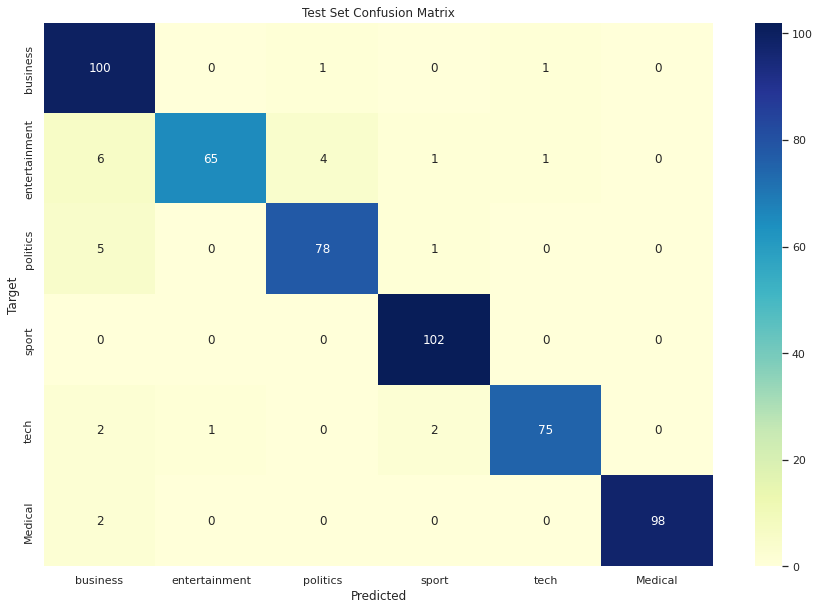

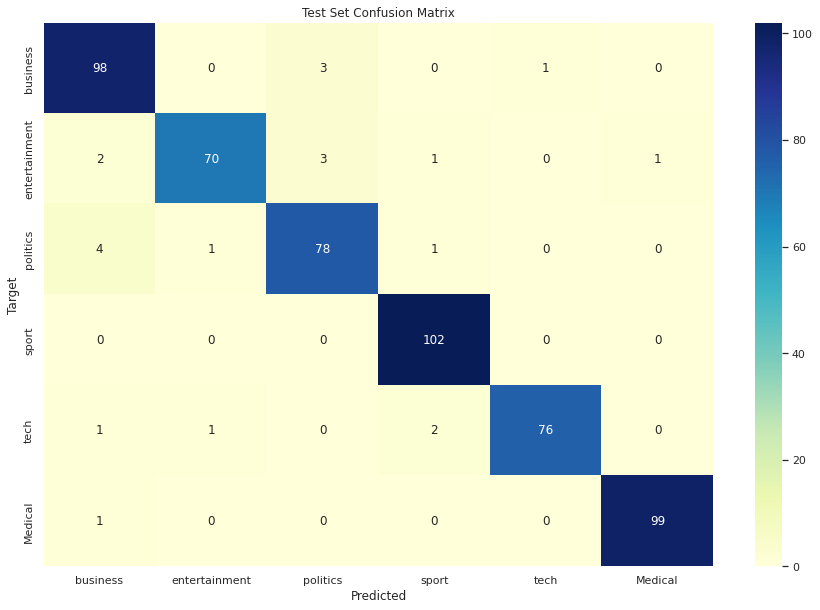

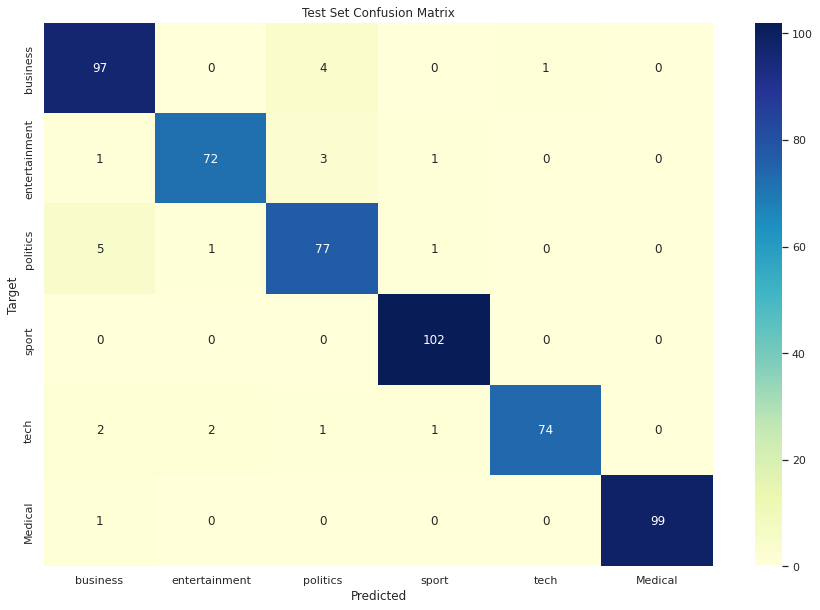

In [ ]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np 



def plot_label_density(data): 
  sns.set() 

  #plt.figure(figsize=(14, 5))
  x, y = "char_count", "y"
  fig, ax = plt.subplots(nrows=1, ncols=2)
  fig.suptitle(x, fontsize=12)
  for i in data['lable'].unique():
      sns.distplot(data[ data['lable']==i ][x], hist=True, kde=False, 
                  bins=10, hist_kws={"alpha":0.8}, 
                  axlabel="histogram", ax=ax[0])
        
      plt.figure(figsize=(10 ,10))
      sns.distplot(data[data['lable']==i][x], hist=False, kde=True, 
                  kde_kws={"shade":True}, axlabel="density",   
                  ax=ax[1])
      
      plt.figure(figsize=(10 ,10))
      
  ax[0].grid(True)
  ax[0].legend(data['lable'].unique())
  ax[1].grid(True)

  plt.figure(figsize=(10 ,10))
  plt.show()

def plot_category_distribustion(data): 
  sns.set()
  data['lable'].value_counts().plot(kind='barh', figsize=(14,5))
  plt.xlabel("Total")
  plt.ylabel("Category")
  plt.title("Category Distribution on US News + Medical Articles",
            fontweight="bold", size=12)

def plot_confusion_matrix(y_test, predicted):
  sns.set()
  unique_label = data["lable"].unique()
  cmtx = pd.DataFrame(
      confusion_matrix(y_test, predicted, labels=unique_label), 
      index=['{:}'.format(x) for x in unique_label], 
      columns=['{:}'.format(x) for x in unique_label]
  )

  plt.figure(figsize=(15, 10))
  ax = sns.heatmap(cmtx, annot=True, fmt="d", cmap="YlGnBu")
  ax.set_ylabel('Target')
  ax.set_xlabel('Predicted');
  ax.set_title("Test Set Confusion Matrix", size=12)

def plot_words_cloud(label_type,data_name):
  """
    label type: is the type of the category we want to get it's word cloud 
    data_name: Name of the data that we're working on
  """

  wordcloud = WordCloud(background_color='white',
                        max_words=100,
                        width=500,
                        height=500
  )

  wordcloud.generate(str(data.query('lable == \'business\'')[data_name]))
  plt.rcParams['figure.figsize'] = (8,8)
  plt.axis('off')
  plt.suptitle('Summarized T5 Articles Word Cloud ('+label_type+' category)', fontsize=16, fontweight='bold')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.show()

def calculate_data_statistics(data):
  dtf = data
  dtf['word_count'] = dtf[data_name].apply(lambda x: len(str(x).split(" ")))
  dtf['char_count'] = dtf[data_name].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
  dtf['sentence_count'] = dtf[data_name].apply(lambda x: len(str(x).split(".")))
  dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']
  dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']
  dtf.head()

  return dtf  

def data_split(data_name,data_lable):
  x_train, x_test, y_train, y_test = train_test_split(data[data_name] , data[data_lable]  , test_size=0.2, random_state=44, stratify = data[data_lable] )
  return x_train, x_test, y_train, y_test

def calculate_accuracy(text_clf, x_test , y_test): 
  predicted = text_clf.predict(x_test)
  print(np.mean(predicted == y_test )) 
  return predicted

def get_misclassified_samples(predicted , y_test, x_text): 
  print("Misclassified Samples Are:\n")
  print(y_test[ (predicted != y_test) ] ) 
  return x_test[ (predicted != y_test) ], y_test[ (predicted != y_test) ]

def get_misclassified_labels(predicted , y_test): 
  print("Misclassified Labels Are:\n")
  print(predicted[ (predicted != y_test) ] ) 
  return predicted[ (predicted != y_test) ], y_test[ (predicted != y_test) ]

def print_classification_report(y_test, predicted,target_names):
  print(classification_report(y_test, predicted, target_names = target_names ))

def naive_bayes(x_train, y_train ): 
  text_clf = Pipeline([
      ('vect', CountVectorizer()),
      ('tfidf', TfidfTransformer()),
      ('clf', MultinomialNB()),
  ])
  text_clf.fit(x_train, y_train )
  return text_clf 

def linear_svm(x_train, y_train): 
  text_clf = Pipeline([
      ('vect', CountVectorizer()),
      ('tfidf', TfidfTransformer()),
      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                            alpha=1e-3, random_state=42,
                            max_iter=5, tol=None)),
  ])
  #Training
  text_clf.fit(x_train, y_train)

  return text_clf

def logistic_regression(x_train, y_train):
  text_clf = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                ])
  
  #Training
  text_clf.fit(x_train, y_train)

  return text_clf


def main(data_name , data_lable,data_type ): 
  """
  data_name: describes the name of the data that we are using at the current time.
  data_type: the type of the data [original or summarized]
  data_lable: label attribute name
  """
  
  target_names = data["lable"].unique()
  

  x_train, x_test, y_train, y_test = data_split(data_name,data_lable)
  NB_text_clf = naive_bayes(x_train, y_train )
  print("\n  ============= naive bayes testing accuracy ==============  \n")
  NB_Predicted = calculate_accuracy(NB_text_clf, x_test, y_test)
  print("\n  ============= naive bayes confusion matrix ==============  \n")
  plot_confusion_matrix(y_test, NB_Predicted)
  print("\n  ============= naive bayes classification report ==============  \n")
  print_classification_report(y_test, NB_Predicted , target_names)
  misclassified_samples , true_samples = get_misclassified_labels(NB_Predicted , y_test)
  print("\n Misclassified Naive Bayes Samples are: \n") 
  print(misclassified_samples)
  print("\n True Samples are: \n") 
  print(true_samples)

  
  svm_text_clf = linear_svm(x_train, y_train )
  print("\n  ============= linear svm accuracy ==============  \n")
  svm_Predicted = calculate_accuracy(svm_text_clf, x_test, y_test)
  print("\n  ============= linear svm confusion matrix ==============  \n")
  plot_confusion_matrix(y_test, svm_Predicted)
  print("\n  ============= linear svm classification report ==============  \n")
  print_classification_report(y_test, svm_Predicted , target_names)
  misclassified_samples , true_samples = get_misclassified_labels(svm_Predicted , y_test)
  print("\n Misclassified Linear SVM Samples are: \n") 
  print(misclassified_samples)
  print("\n True Samples are: \n") 
  print(true_samples)


  lr_text_clf = logistic_regression(x_train, y_train )
  print("\n  ============= logistic regression accuracy ==============  \n")
  lr_Predicted = calculate_accuracy(lr_text_clf, x_test, y_test)
  print("\n  ============= logistic regression confusion matrix ==============  \n")
  plot_confusion_matrix(y_test, lr_Predicted)
  print("\n  ============= logistic regression classification report ==============  \n")
  print_classification_report(y_test, lr_Predicted , target_names)
  misclassified_samples , true_samples = get_misclassified_labels(lr_Predicted , y_test)
  print("\n Misclassified Linear lr Samples are: \n") 
  print(misclassified_samples)
  print("\n True Samples are: \n") 
  print(true_samples)


"""
data_name = ['summarized_T5',  'summarized_LSA', 'clean_text4'] 
data_lable = 'lable'
data_type = ['Summary' , 'Original' ]

"""
data_name = 'summarized_T5'
data_lable = 'lable'
data_type = 'Summary' 

main(data_name , data_lable,data_type ) 



# Apply K-means before summarization

In [51]:
import pandas as pd
df = pd.read_csv("/content/new_df.csv")
df

,Unnamed: 0,clean_text4,lable,tokenized_sents
0,0,ad sale boost time warner profit quarterly pro...,business,"['ad', 'sale', 'boost', 'time', 'warner', 'pro..."
1,1,dollar gain greenspan speech dollar ha hit hig...,business,"['dollar', 'gain', 'greenspan', 'speech', 'dol..."
2,2,yukos unit buyer face loan claim owner embattl...,business,"['yukos', 'unit', 'buyer', 'face', 'loan', 'cl..."
3,3,high fuel price hit ba profit british airways ...,business,"['high', 'fuel', 'price', 'hit', 'ba', 'profit..."
4,4,pernod takeover talk lift domecq shares uk dri...,business,"['pernod', 'takeover', 'talk', 'lift', 'domecq..."
...,...,...,...,...
2720,2720,iddle east respiratory syndrome coronavirus me...,Medical,"['iddle', 'east', 'respiratory', 'syndrome', '..."
2721,2721,background since november perhaps earlier outb...,Medical,"['background', 'since', 'november', 'perhaps',..."
2722,2722,introduction around million people worldwide c...,Medical,"['introduction', 'around', 'million', 'people'..."
2723,2723,study bat serum specimen n collected south afr...,Medical,"['study', 'bat', 'serum', 'specimen', 'n', 'co..."


##**k-means**

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


###**k-means BOW , TF**

In [ ]:
def data_bow(data):
  count_vect = CountVectorizer()
  bow = count_vect.fit_transform(df['clean_text4'].values).toarray()
  return bow

def data_tf(data):
  tfidf_vect = TfidfVectorizer()
  tfidf = tfidf_vect.fit_transform(df['clean_text4'].values).toarray()
  return tfidf

def pca_function(data):
  pca = PCA(n_components=2)
  pca=pca.fit_transform(data) 
  return pca

def kmeans():
  kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=100)
  pred_y = kmeans.fit_predict(df['clean_text4'])
  return pred_y
 

### **Plotting elbow and silhouette for k-means**








In [8]:
def plot_eblow_silh(data,title_1,title_2):
  wcss = []
  for i in range(2, 6):
      kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
      x = kmeans.fit(data)
      wcss.append(kmeans.inertia_)
  s = []
  for i in range(2, 6):
      kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
      y = kmeans.fit(data)
      s.append(silhouette_score(data, kmeans.labels_))
  #ploting 
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
  axes[0].plot(range(2, 6), wcss)
  axes[1].plot(range(2, 6), s)
  axes[0].set_title(title_1, fontsize=18)
  axes[1].set_title(title_2, fontsize=18)
  return fig.tight_layout()

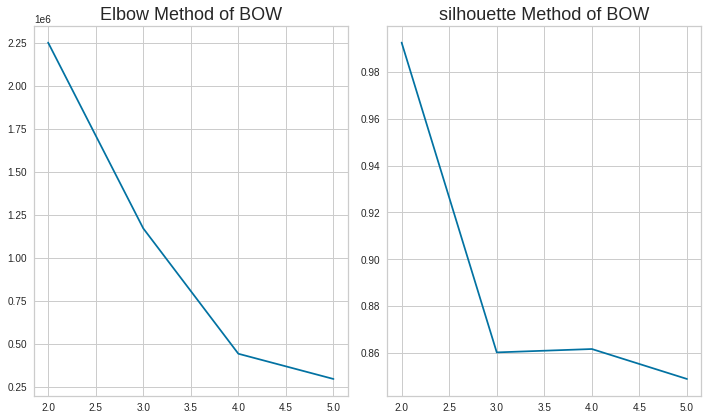

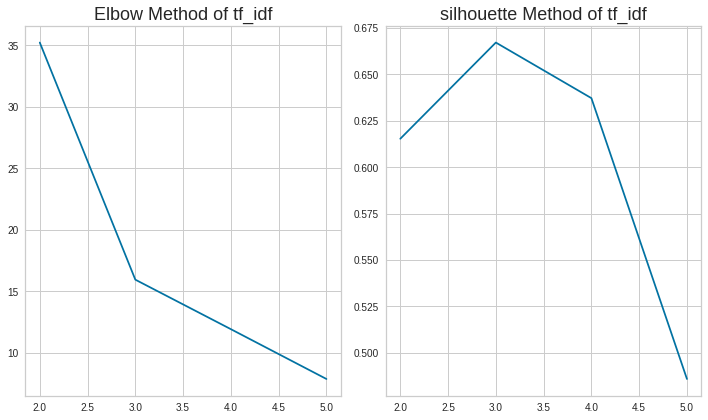

In [ ]:
d1 = data_bow(df)
data_bow = pca_function(d1)

d2 = data_tf(df)
data_tf = pca_function(d2)

# CountVectorizedData_PCA = pca_function(data_2)

# train_vecs = pca_function(train_vecs)
plot_eblow_silh(data_bow,title_1='Elbow Method of BOW',title_2='silhouette Method of BOW')
plot_eblow_silh(data_tf,title_1='Elbow Method of tf_idf',title_2='silhouette Method of tf_idf')
# plot_eblow_silh(CountVectorizedData_PCA,title_1='Elbow Method of  W2Vec',title_2='silhouette Method of  W2Vec')



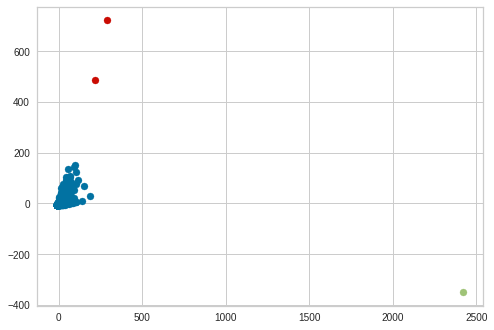

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=1, random_state=0)
y_kmeans_bow = kmeans.fit_predict(data_bow)

kmeans.fit(data_bow)
y_kmeans = kmeans.predict(data_bow)

plt.scatter(data_bow[y_kmeans==0,0],data_bow[y_kmeans==0,1])
plt.scatter(data_bow[y_kmeans==1,0],data_bow[y_kmeans==1,1])
plt.scatter(data_bow[y_kmeans==2,0],data_bow[y_kmeans==2,1])
plt.scatter(data_bow[y_kmeans==3,0],data_bow[y_kmeans==3,1])


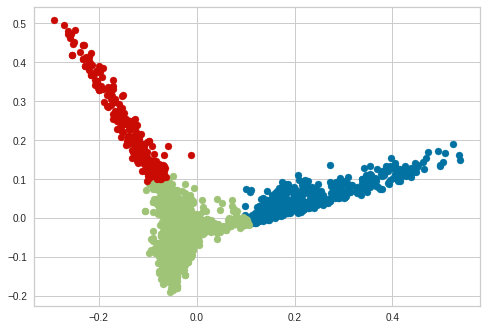

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=1, random_state=0)
y_kmeans_tf = kmeans.fit_predict(data_tf)

kmeans.fit(data_tf)
y_kmeans = kmeans.predict(data_tf)

plt.scatter(data_tf[y_kmeans==0,0],data_tf[y_kmeans==0,1])
plt.scatter(data_tf[y_kmeans==1,0],data_tf[y_kmeans==1,1])
plt.scatter(data_tf[y_kmeans==2,0],data_tf[y_kmeans==2,1])


###The Evaluation of k-means

####evaluation Silhouette

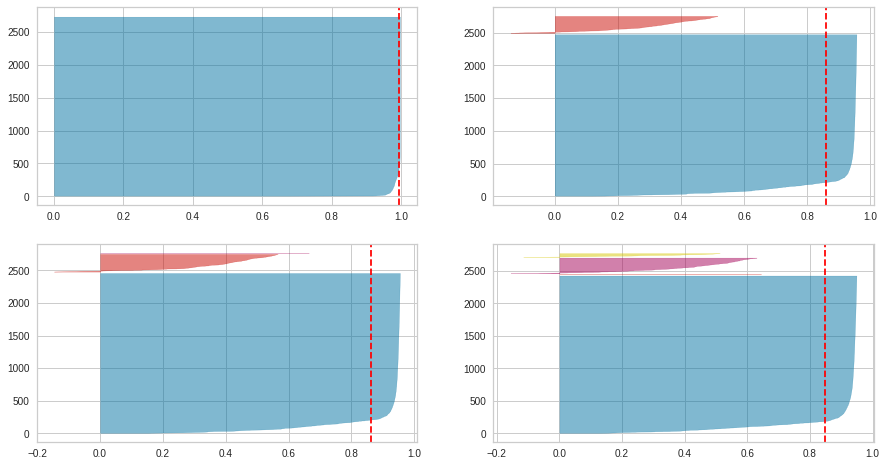

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_bow)


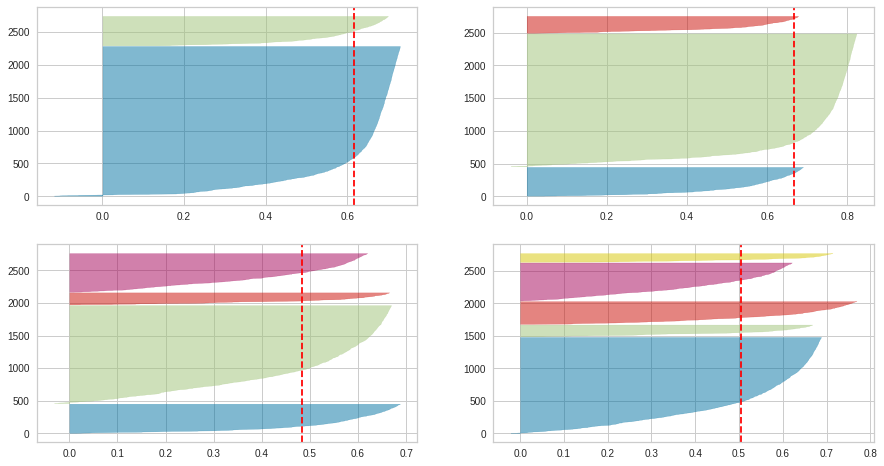

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_tf)

In [ ]:
# Silhouette analysis of BOW
range_n_clusters = [2,3,4,5]
for num_clusters in range_n_clusters:
  # d3 = data_bow(df)
  count_vect = CountVectorizer()
  bow = count_vect.fit_transform(df['clean_text4'].values).toarray()
  kmeans_bow = KMeans(n_clusters =num_clusters,random_state=0)
  kmeans_bow.fit(bow)
  labels_bow_3 = kmeans_bow.labels_
  cluster_center_bow=kmeans_bow.cluster_centers_
  # silhouette score
  silhouette_score_bow = metrics.silhouette_score(bow, labels_bow_3, metric='euclidean')
  
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_score_bow))

For n_clusters=2, the silhouette score is 0.972542147880334
For n_clusters=3, the silhouette score is 0.7009840505740202
For n_clusters=4, the silhouette score is 0.6943006574460836
For n_clusters=5, the silhouette score is 0.6914388126774068


In [ ]:
# Silhouette analysis of TF-IDF
range_n_clusters = [2,3,4,5]
for num_clusters in range_n_clusters:
  # d2 = data_tf()
  tfidf_vect = TfidfVectorizer()
  tfidf = tfidf_vect.fit_transform(df['clean_text4'].values).toarray()
  kmeans_tf = KMeans(n_clusters =num_clusters,random_state=0)
  kmeans_tf.fit(tfidf)
  labels_tf_3 = kmeans_tf.labels_
  cluster_center_tf=kmeans_tf.cluster_centers_
  # silhouette score
  silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf_3, metric='euclidean')
  
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_score_tf))


For n_clusters=2, the silhouette score is 0.011629934164007236
For n_clusters=3, the silhouette score is 0.009699069255677267
For n_clusters=4, the silhouette score is 0.012201274506778395
For n_clusters=5, the silhouette score is 0.014227357360616475


# Apply K-means after summarization

In [2]:
import pandas as pd
df_testind_compare=pd.read_csv("df_testind_compare.csv")

In [3]:
df_testind_compare

,Unnamed: 0,summarized_T5,summarized_LSA,lable,clean_text_for_LSA
0,0,google profit quarterly profit us medium giant...,['Its profits were buoyed by one-off gains whi...,business,Its profits were buoyed by one-off gains which...
1,1,dollar gain greenspan speech dollar ha hit hig...,"[""And Alan Greenspan highlighted the US govern...",business,And Alan Greenspan highlighted the US governme...
2,2,yukos unit buyer face loan claim owner embattl...,"[""Yukos' owner Menatep Group says it will ask ...",business,Yukos' owner Menatep Group says it will ask Ro...
3,3,ba profit british airways ha blamed high fuel ...,['British Airways has blamed high fuel prices ...,business,British Airways has blamed high fuel prices fo...
4,4,pernod takeover talk lift domecq shares uk dri...,"[""Shares in UK drinks and food firm Allied Dom...",business,Shares in UK drinks and food firm Allied Domec...
...,...,...,...,...,...
2269,2269,eukaryote cell gene assigned function share co...,['More than 75% of the genes have an assigned ...,Medical,More than 75% of the genes have an assigned fu...
2270,2270,eu landfill directive rough sbe cannot landfil...,['The SBE also could be added at 0.5 to 2 % as...,Medical,The SBE also could be added at 0.5 to 2 % as a...
2271,2271,mers coronavirus cov include recent direct con...,['We also genetically sequenced MERS-CoV from ...,Medical,We also genetically sequenced MERS-CoV from re...
2272,2272,asia pacifi c region ha highlighted asia pacif...,['Those who did not respond were reminded by l...,Medical,Those who did not respond were reminded by let...


## 1- for T5

In [5]:
def data_bow(data):
  count_vect = CountVectorizer()
  bow = count_vect.fit_transform(df_testind_compare['summarized_T5'].values).toarray()
  return bow

def data_tf(data):
  tfidf_vect = TfidfVectorizer()
  tfidf = tfidf_vect.fit_transform(df_testind_compare['summarized_T5'].values).toarray()
  return tfidf

def pca_function(data):
  pca = PCA(n_components=2)
  pca=pca.fit_transform(data) 
  return pca

def kmeans():
  kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=100)
  pred_y = kmeans.fit_predict(df_testind_compare['summarized_T5'])
  return pred_y
 

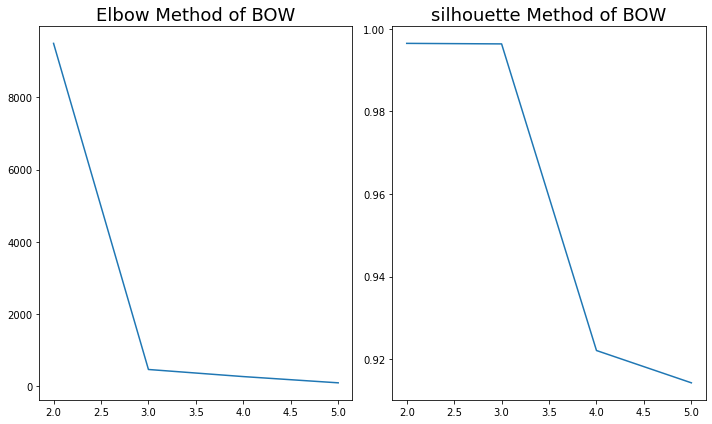

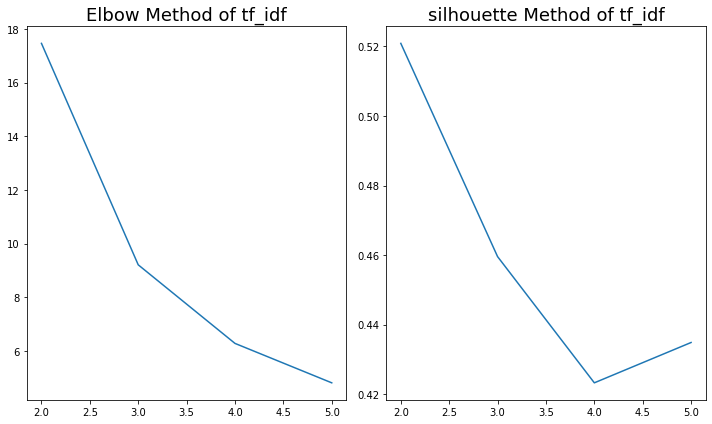

In [9]:
d1_t5 = data_bow(df_testind_compare)
data_bow_t5 = pca_function(d1_t5)

d2_t5= data_tf(df_testind_compare)
data_tf_t5 = pca_function(d2_t5)

# CountVectorizedData_PCA = pca_function(data_2)

# train_vecs = pca_function(train_vecs)
plot_eblow_silh(data_bow_t5,title_1='Elbow Method of BOW',title_2='silhouette Method of BOW')
plot_eblow_silh(data_tf_t5,title_1='Elbow Method of tf_idf',title_2='silhouette Method of tf_idf')
# plot_eblow_silh(CountVectorizedData_PCA,title_1='Elbow Method of  W2Vec',title_2='silhouette Method of  W2Vec')



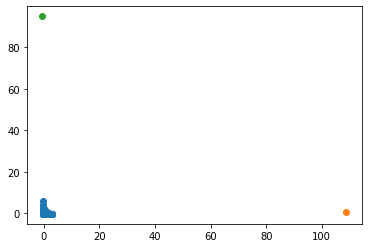

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=1, random_state=0)
y_kmeans_bow = kmeans.fit_predict(data_bow_t5)

kmeans.fit(data_bow_t5)
y_kmeans = kmeans.predict(data_bow_t5)

plt.scatter(data_bow_t5[y_kmeans==0,0],data_bow_t5[y_kmeans==0,1])
plt.scatter(data_bow_t5[y_kmeans==1,0],data_bow_t5[y_kmeans==1,1])
plt.scatter(data_bow_t5[y_kmeans==2,0],data_bow_t5[y_kmeans==2,1])
plt.scatter(data_bow_t5[y_kmeans==3,0],data_bow_t5[y_kmeans==3,1])


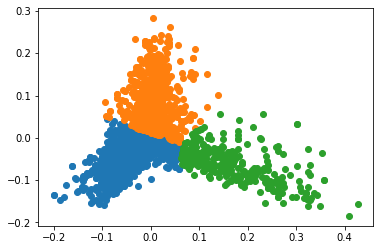

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=1, random_state=0)
y_kmeans_tf = kmeans.fit_predict(data_tf_t5)

kmeans.fit(data_tf_t5)
y_kmeans = kmeans.predict(data_tf_t5)

plt.scatter(data_tf_t5[y_kmeans==0,0],data_tf_t5[y_kmeans==0,1])
plt.scatter(data_tf_t5[y_kmeans==1,0],data_tf_t5[y_kmeans==1,1])
plt.scatter(data_tf_t5[y_kmeans==2,0],data_tf_t5[y_kmeans==2,1])


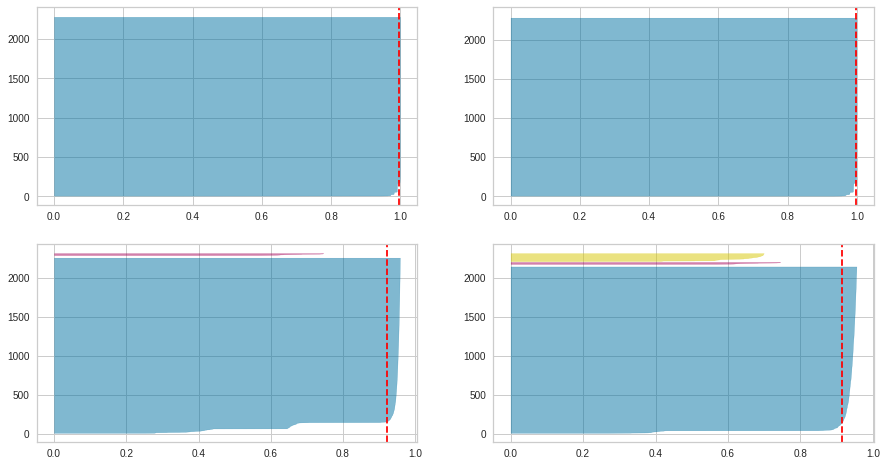

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_bow_t5)


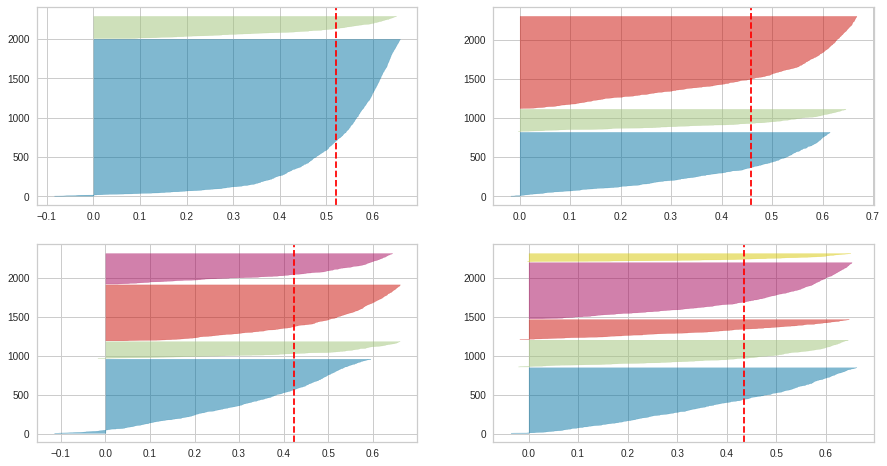

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_tf_t5)

In [15]:
# Silhouette analysis of BOW
range_n_clusters = [2,3,4,5]
for num_clusters in range_n_clusters:
  # d3 = data_bow(df)
  count_vect = CountVectorizer()
  bow = count_vect.fit_transform(df_testind_compare['summarized_T5'].values).toarray()
  kmeans_bow = KMeans(n_clusters =num_clusters,random_state=0)
  kmeans_bow.fit(bow)
  labels_bow_3 = kmeans_bow.labels_
  cluster_center_bow=kmeans_bow.cluster_centers_
  # silhouette score
  silhouette_score_bow = metrics.silhouette_score(bow, labels_bow_3, metric='euclidean')
  
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_score_bow))

For n_clusters=2, the silhouette score is 0.868075805076603
For n_clusters=3, the silhouette score is 0.023663708307717888
For n_clusters=4, the silhouette score is 0.05763462681789349
For n_clusters=5, the silhouette score is 0.02468665969947887


In [16]:
# Silhouette analysis of TF-IDF
range_n_clusters = [2,3,4,5]
for num_clusters in range_n_clusters:
  # d2 = data_tf()
  tfidf_vect = TfidfVectorizer()
  tfidf = tfidf_vect.fit_transform(df_testind_compare['summarized_T5'].values).toarray()
  kmeans_tf = KMeans(n_clusters =num_clusters,random_state=0)
  kmeans_tf.fit(tfidf)
  labels_tf_3 = kmeans_tf.labels_
  cluster_center_tf=kmeans_tf.cluster_centers_
  # silhouette score
  silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf_3, metric='euclidean')
  
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_score_tf))


For n_clusters=2, the silhouette score is 0.004462642594708442
For n_clusters=3, the silhouette score is 0.004857502763021215
For n_clusters=4, the silhouette score is 0.00610166568264804
For n_clusters=5, the silhouette score is 0.0072551421326026416


# 2- for LSA

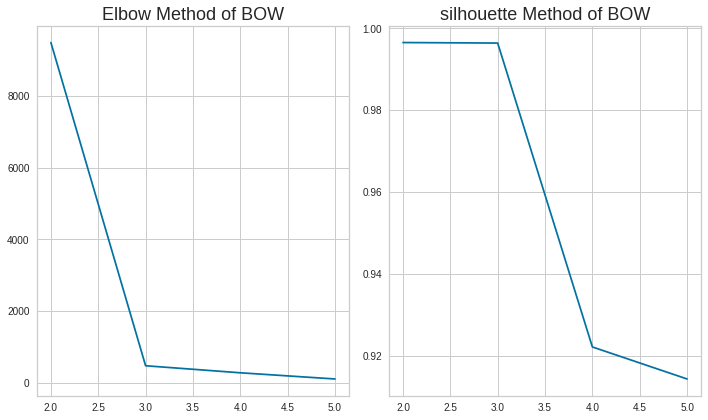

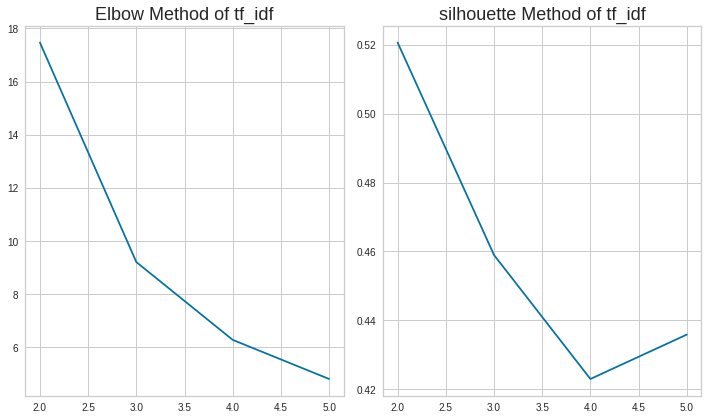

In [19]:
d1_LSA = data_bow(df_testind_compare)
data_bow_LSA = pca_function(d1_LSA)

d2_LSA = data_tf(df_testind_compare)
data_tf_LSA = pca_function(d2_LSA)

# CountVectorizedData_PCA = pca_function(data_2)

# train_vecs = pca_function(train_vecs)
plot_eblow_silh(data_bow_LSA,title_1='Elbow Method of BOW',title_2='silhouette Method of BOW')
plot_eblow_silh(data_tf_LSA,title_1='Elbow Method of tf_idf',title_2='silhouette Method of tf_idf')
# plot_eblow_silh(CountVectorizedData_PCA,title_1='Elbow Method of  W2Vec',title_2='silhouette Method of  W2Vec')



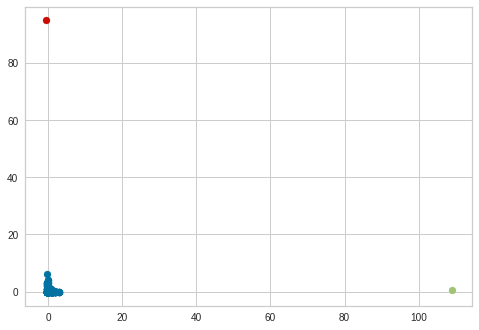

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=1, random_state=0)
y_kmeans_bow = kmeans.fit_predict(data_bow_LSA)

kmeans.fit(data_bow_LSA)
y_kmeans = kmeans.predict(data_bow_LSA)

plt.scatter(data_bow_LSA[y_kmeans==0,0],data_bow_LSA[y_kmeans==0,1])
plt.scatter(data_bow_LSA[y_kmeans==1,0],data_bow_LSA[y_kmeans==1,1])
plt.scatter(data_bow_LSA[y_kmeans==2,0],data_bow_LSA[y_kmeans==2,1])
plt.scatter(data_bow_LSA[y_kmeans==3,0],data_bow_LSA[y_kmeans==3,1])


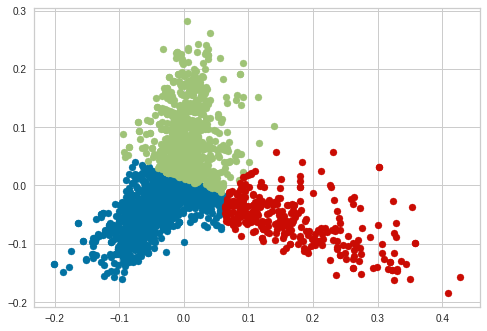

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=1, random_state=0)
y_kmeans_tf = kmeans.fit_predict(data_tf_LSA)

kmeans.fit(data_tf_LSA)
y_kmeans = kmeans.predict(data_tf_LSA)

plt.scatter(data_tf_LSA[y_kmeans==0,0],data_tf_LSA[y_kmeans==0,1])
plt.scatter(data_tf_LSA[y_kmeans==1,0],data_tf_LSA[y_kmeans==1,1])
plt.scatter(data_tf_LSA[y_kmeans==2,0],data_tf_LSA[y_kmeans==2,1])


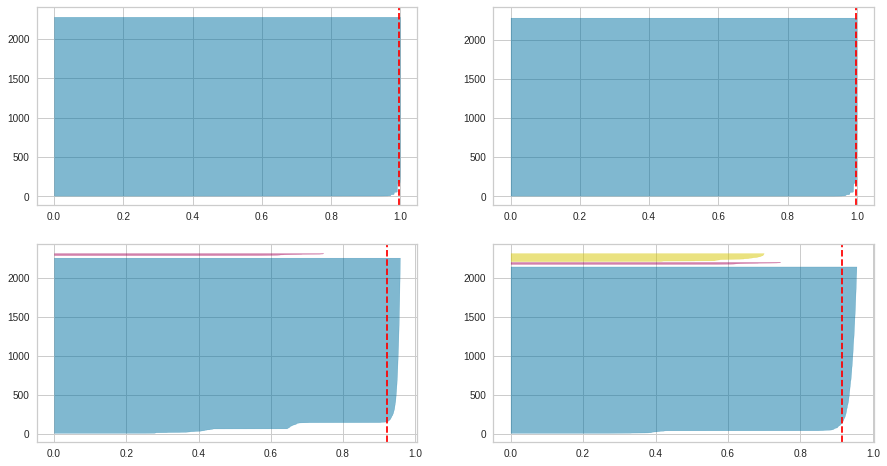

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_bow_LSA)


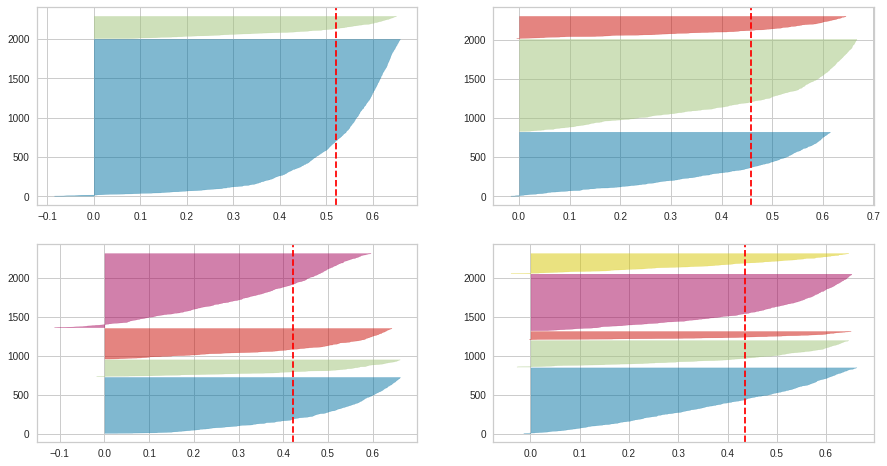

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_tf_LSA)


In [26]:
# Silhouette analysis of BOW
range_n_clusters = [2,3,4,5]
for num_clusters in range_n_clusters:
  # d3 = data_bow(df)
  count_vect = CountVectorizer()
  bow = count_vect.fit_transform(df_testind_compare['summarized_T5'].values).toarray()
  kmeans_bow = KMeans(n_clusters =num_clusters,random_state=0)
  kmeans_bow.fit(bow)
  labels_bow_3 = kmeans_bow.labels_
  cluster_center_bow=kmeans_bow.cluster_centers_
  # silhouette score
  silhouette_score_bow = metrics.silhouette_score(bow, labels_bow_3, metric='euclidean')
  
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_score_bow))

For n_clusters=2, the silhouette score is 0.868075805076603
For n_clusters=3, the silhouette score is 0.023663708307717888
For n_clusters=4, the silhouette score is 0.05763462681789349
For n_clusters=5, the silhouette score is 0.02468665969947887


In [27]:
# Silhouette analysis of TF-IDF
range_n_clusters = [2,3,4,5]
for num_clusters in range_n_clusters:
  # d2 = data_tf()
  tfidf_vect = TfidfVectorizer()
  tfidf = tfidf_vect.fit_transform(df_testind_compare['summarized_T5'].values).toarray()
  kmeans_tf = KMeans(n_clusters =num_clusters,random_state=0)
  kmeans_tf.fit(tfidf)
  labels_tf_3 = kmeans_tf.labels_
  cluster_center_tf=kmeans_tf.cluster_centers_
  # silhouette score
  silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf_3, metric='euclidean')
  
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_score_tf))


For n_clusters=2, the silhouette score is 0.004462642594708442
For n_clusters=3, the silhouette score is 0.004857502763021215
For n_clusters=4, the silhouette score is 0.00610166568264804
For n_clusters=5, the silhouette score is 0.0072551421326026416


# Pegasus

## Install Dependencies

In [45]:
# Install PyTorch
!pip3 install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/lts/1.8/cu111
     |█████████████▌                  | 834.1 MB 1.5 MB/s eta 0:13:04tcmalloc: large alloc 1147494400 bytes == 0x39b58000 @  0x7ff1231d5615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:12:07tcmalloc: large alloc 1434370048 bytes == 0x7e1ae000 @  0x7ff1231d5615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████▋    

In [46]:
# Install transformers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 14.7 MB/s 
     |████████████████████████████████| 101 kB 9.8 MB/s 
     |████████████████████████████████| 6.6 MB 37.5 MB/s 
     |████████████████████████████████| 596 kB 22.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [47]:
# Load tokenizer 
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 14.4 MB/s 


In [55]:
final_df_sum = pd.read_csv("/content/testing_data_   clean_text4 column.csv")

In [73]:
final_df_sum

,Unnamed: 0,text,lable,lem_sentences,clean_text,textt_to_be_clean,clean_text2,clean_text3,clean_text4
0,1,Profits boosted by sales of high-speed interne...,Medical,"['Profits', 'boosted', 'by', 'sale', 'of', 'hi...","['Profits', 'boosted', 'sale', 'high-speed', '...",Profits boosted sale high-speed internet conne...,profits boosted sale high speed internet conne...,profits boosted sale high speed internet conne...,profits boosted sale high speed internet conne...
1,2,Dollar hits highest level against euro in almo...,Medical,"['Dollar', 'hit', 'highest', 'level', 'against...","['Dollar', 'hit', 'highest', 'level', 'euro', ...",Dollar hit highest level euro almost three mon...,dollar hit highest level euro almost three mon...,dollar hit highest level euro almost three mon...,dollar hit highest level euro almost three mon...
2,3,Yukos owner Menatep Group says it will ask Ros...,Medical,"['Yukos', 'owner', 'Menatep', 'Group', 'say', ...","['Yukos', 'owner', 'Menatep', 'Group', 'say', ...",Yukos owner Menatep Group say ask Rosneft repa...,yukos owner menatep group say ask rosneft repa...,yukos owner menatep group say ask rosneft repa...,yukos owner menatep group say ask rosneft repa...
3,4,BA last year introduced a fuel surcharge for p...,Medical,"['BA', 'last', 'year', 'introduced', 'a', 'fue...","['BA', 'last', 'year', 'introduced', 'fuel', '...",BA last year introduced fuel surcharge passeng...,ba last year introduced fuel surcharge passeng...,ba last year introduced fuel surcharge passeng...,ba last year introduced fuel surcharge passeng...
4,5,Japan's economy teeters on brink of technical ...,Medical,"[""Japan's"", 'economy', 'teeter', 'on', 'brink'...","[""Japan's"", 'economy', 'teeter', 'brink', 'tec...",Japan's economy teeter brink technical recessi...,japan s economy teeter brink technical recessi...,japan s economy teeter brink technical recessi...,japan economy teeter brink technical recession...
...,...,...,...,...,...,...,...,...,...
2269,2220,BT program to beat dialler scams\n\nBT is intr...,tech,"['BT', 'program', 'to', 'beat', 'dialler', 'sc...","['BT', 'program', 'beat', 'dialler', 'scam', '...",BT program beat dialler scam BT introducing tw...,bt program beat dialler scam bt introducing tw...,bt program beat dialler scam bt introducing tw...,bt program beat dialler scam bt introducing tw...
2270,2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech,"['Spam', 'e-mail', 'tempt', 'net', 'shopper', ...","['Spam', 'e-mail', 'tempt', 'net', 'shopper', ...",Spam e-mail tempt net shopper Computer user ac...,spam e mail tempt net shopper computer user ac...,spam e mail tempt net shopper computer user ac...,spam e mail tempt net shopper computer user ac...
2271,2222,Be careful how you code\n\nA new European dire...,tech,"['Be', 'careful', 'how', 'you', 'code', 'A', '...","['Be', 'careful', 'code', 'A', 'new', 'Europea...",Be careful code A new European directive could...,be careful code a new european directive could...,be careful code a new european directive could...,careful code new european directive could put ...
2272,2223,US cyber security chief resigns\n\nThe man mak...,tech,"['US', 'cyber', 'security', 'chief', 'resigns'...","['US', 'cyber', 'security', 'chief', 'resigns'...",US cyber security chief resigns The man making...,us cyber security chief resigns the man making...,us cyber security chief resigns the man making...,us cyber security chief resigns man making sur...


## Import and Load Model

In [48]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

In [49]:
# Load model 
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")


In [50]:
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")

In [83]:
#summarize tech
token = tokenizer(final_df_sum['clean_text4'][2269], truncation=True, padding="longest", return_tensors="pt")
summ_business_1 = model.generate(**token)


/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [84]:
tokenizer.decode(summ_business_1[0],skip_special_tokens=True)

"A look at some of the measures being taken by the UK's premium rate service watchdog, icstis."

In [85]:
#summarize tech
token = tokenizer(final_df_sum['clean_text4'][2270], truncation=True, padding="longest", return_tensors="pt")
summ_business_2 = model.generate(**token)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [86]:
tokenizer.decode(summ_business_2[0],skip_special_tokens=True)

'spam e mail bought net shopper computer user across world continue ignore security warning spam e mail lures buying goods jewellery well selling good service driving advertising traffic organised crime ring spam glean personal information business software alliance bsa warned people stay alert many online consumer consider true motif spammers'

In [94]:
#summarize Medical
token = tokenizer(final_df_sum['clean_text4'][10], truncation=True, padding="longest", return_tensors="pt")
summ_Medical_1 = model.generate(**token)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [95]:
tokenizer.decode(summ_Medical_1[0],skip_special_tokens=True)

"Indonesia's President Susilo Bambang Yudhoyono says the government is considering raising fuel prices."

In [107]:
#summarize Medical
token = tokenizer(final_df_sum['clean_text4'][5], truncation=True, padding="longest", return_tensors="pt")
summ_Medical_2= model.generate(**token)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [108]:
tokenizer.decode(summ_Medical_2[0],skip_special_tokens=True)

'The number of people claiming unemployment benefit in the UK has fallen to its lowest level since records began in 1992.'

## for evauation

In [36]:
pip install Rouge


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


evalute tech summarize

In [87]:

ref=final_df_sum.clean_text4
summarized_sentence_tech="A look at some of the measures being taken by the UK's premium rate service watchdog, icstis."

In [88]:
from rouge import Rouge
r = Rouge()
r.get_scores(ref[2269],summarized_sentence_tech)

[{'rouge-1': {'f': 0.042328040778253744, 'p': 0.023121387283236993, 'r': 0.25},
  'rouge-2': {'f': 0.01599999880192009, 'p': 0.008547008547008548, 'r': 0.125},
  'rouge-l': {'f': 0.042328040778253744,
   'p': 0.023121387283236993,
   'r': 0.25}}]

In [91]:
ref=final_df_sum.clean_text4
summarized_sentence_tech="spam e mail bought net shopper computer user across world continue ignore security warning spam e mail lures buying goods jewellery well selling good service driving advertising traffic organised crime ring spam glean personal information business software alliance bsa warned people stay alert many online consumer consider true motif spammers"

In [92]:
r = Rouge()
r.get_scores(ref[2270],summarized_sentence_tech)

[{'rouge-1': {'f': 0.4347826052388621,
   'p': 0.2795031055900621,
   'r': 0.9782608695652174},
  'rouge-2': {'f': 0.32931726601377403,
   'p': 0.20297029702970298,
   'r': 0.8723404255319149},
  'rouge-l': {'f': 0.4251207694900698,
   'p': 0.2732919254658385,
   'r': 0.9565217391304348}}]

evalute medical summarize

In [100]:

ref=final_df_sum.clean_text4
summarized_sentence_medical="Indonesia's President Susilo Bambang Yudhoyono says the government is considering raising fuel prices."
r.get_scores(ref[10],summarized_sentence_medical)

[{'rouge-1': {'f': 0.21621621165814472,
   'p': 0.16666666666666666,
   'r': 0.3076923076923077},
  'rouge-2': {'f': 0.10526315357340738,
   'p': 0.07692307692307693,
   'r': 0.16666666666666666},
  'rouge-l': {'f': 0.21621621165814472,
   'p': 0.16666666666666666,
   'r': 0.3076923076923077}}]

In [109]:
ref=final_df_sum.clean_text4
summarized_sentence_medical="The number of people claiming unemployment benefit in the UK has fallen to its lowest level since records began in 1992."
r = Rouge()
r.get_scores(ref[5],summarized_sentence_medical)

[{'rouge-1': {'f': 0.18181817685950424, 'p': 0.16666666666666666, 'r': 0.2},
  'rouge-2': {'f': 0.08888888395061757, 'p': 0.08, 'r': 0.1},
  'rouge-l': {'f': 0.18181817685950424, 'p': 0.16666666666666666, 'r': 0.2}}]